In [9]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
sns.set(style='whitegrid')

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
master_df = pd.read_csv('TAA/master_df.csv')
master_df.head(2)

,geography,geographic_area_name,s0101_total_total_population,s0101_total_total_population_age_under_5_years,s0101_total_total_population_age_5_to_9_years,s0101_total_total_population_age_10_to_14_years,s0101_total_total_population_age_15_to_19_years,s0101_total_total_population_age_20_to_24_years,s0101_total_total_population_age_25_to_29_years,s0101_total_total_population_age_30_to_34_years,s0101_total_total_population_age_35_to_39_years,s0101_total_total_population_age_40_to_44_years,s0101_total_total_population_age_45_to_49_years,s0101_total_total_population_age_50_to_54_years,s0101_total_total_population_age_55_to_59_years,s0101_total_total_population_age_60_to_64_years,s0101_total_total_population_age_65_to_69_years,s0101_total_total_population_age_70_to_74_years,s0101_total_total_population_age_75_to_79_years,s0101_total_total_population_age_80_to_84_years,s0101_total_total_population_age_85_years_and_over,s0101_total_total_population_selected_age_categories_5_to_14_years,s0101_total_total_population_selected_age_categories_15_to_17_years,s0101_total_total_population_selected_age_categories_under_18_years,s0101_total_total_population_selected_age_categories_18_to_24_years,s0101_total_total_population_selected_age_categories_15_to_44_years,s0101_total_total_population_selected_age_categories_16_years_and_over,s0101_total_total_population_selected_age_categories_18_years_and_over,s0101_total_total_population_selected_age_categories_21_years_and_over,s0101_total_total_population_selected_age_categories_60_years_and_over,s0101_total_total_population_selected_age_categories_62_years_and_over,s0101_total_total_population_selected_age_categories_65_years_and_over,s0101_total_total_population_selected_age_categories_75_years_and_over,s0101_total_total_population_summary_indicators_median_age_years,s0101_male_total_population,s0101_male_total_population_age_under_5_years,s0101_male_total_population_age_5_to_9_years,s0101_male_total_population_age_10_to_14_years,s0101_male_total_population_age_15_to_19_years,s0101_male_total_population_age_20_to_24_years,s0101_male_total_population_age_25_to_29_years,s0101_male_total_population_age_30_to_34_years,s0101_male_total_population_age_35_to_39_years,s0101_male_total_population_age_40_to_44_years,s0101_male_total_population_age_45_to_49_years,s0101_male_total_population_age_50_to_54_years,s0101_male_total_population_age_55_to_59_years,s0101_male_total_population_age_60_to_64_years,s0101_male_total_population_age_65_to_69_years,s0101_male_total_population_age_70_to_74_years,s0101_male_total_population_age_75_to_79_years,s0101_male_total_population_age_80_to_84_years,s0101_male_total_population_age_85_years_and_over,s0101_male_total_population_selected_age_categories_5_to_14_years,s0101_male_total_population_selected_age_categories_15_to_17_years,s0101_male_total_population_selected_age_categories_under_18_years,s0101_male_total_population_selected_age_categories_18_to_24_years,s0101_male_total_population_selected_age_categories_15_to_44_years,s0101_male_total_population_selected_age_categories_16_years_and_over,s0101_male_total_population_selected_age_categories_18_years_and_over,s0101_male_total_population_selected_age_categories_21_years_and_over,s0101_male_total_population_selected_age_categories_60_years_and_over,s0101_male_total_population_selected_age_categories_62_years_and_over,s0101_male_total_population_selected_age_categories_65_years_and_over,s0101_male_total_population_selected_age_categories_75_years_and_over,s0101_male_total_population_summary_indicators_median_age_years,s0101_female_total_population,s0101_female_total_population_age_under_5_years,s0101_female_total_population_age_5_to_9_years,s0101_female_total_population_age_10_to_14_years,s0101_female_total_population_age_15_to_19_years,s0101_female_total_population_age_20_to_24_years,s0101_female_total_population_age_25_to_29_years,s0101_female_total_population_age_30_to_34_years,s0101_female_total_population_age_35_to_39

In [3]:
# Missing values
missing_counts = master_df.isna().sum().sort_values(ascending=False)
print("🔍 Top columns with missing values:")
print(missing_counts[missing_counts > 0].head(10))

# Zero values
zero_counts = (master_df == 0).sum().sort_values(ascending=False)
print("\n🔍 Top columns with zero values:")
print(zero_counts[zero_counts > 0].head(10))

🔍 Top columns with missing values:
s1501_total_poverty_rate_for_the_population_25_years_and_over_for_whom_poverty_status_is_determined_by_educational_attainment_level_bachelors_degree_or_higher                   11
s1501_total_poverty_rate_for_the_population_25_years_and_over_for_whom_poverty_status_is_determined_by_educational_attainment_level_some_college_or_associates_degree            11
s1501_total_poverty_rate_for_the_population_25_years_and_over_for_whom_poverty_status_is_determined_by_educational_attainment_level_high_school_graduate_includes_equivalency    11
s1501_total_poverty_rate_for_the_population_25_years_and_over_for_whom_poverty_status_is_determined_by_educational_attainment_level_less_than_high_school_graduate               11
s1901_married_couple_families_mean_income_dollars                                                                                                                                10
s2301_unemployment_rate_population_16_years_and_over_race_and_his

In [4]:
# Drop columns with all missing values
df_cleaned = master_df.dropna(axis=1, how='all')

# Shape comparison
print(f"Original shape: {master_df.shape}")
print(f"Cleaned shape:  {df_cleaned.shape}")

# Optional: List removed columns
removed_columns = set(master_df.columns) - set(df_cleaned.columns)
print(f"\nDropped {len(removed_columns)} columns (100% missing only):")
for col in sorted(removed_columns):
    print(f"• {col}")

Original shape: (11, 462)
Cleaned shape:  (11, 458)

Dropped 4 columns (100% missing only):
• s1501_total_poverty_rate_for_the_population_25_years_and_over_for_whom_poverty_status_is_determined_by_educational_attainment_level_bachelors_degree_or_higher
• s1501_total_poverty_rate_for_the_population_25_years_and_over_for_whom_poverty_status_is_determined_by_educational_attainment_level_high_school_graduate_includes_equivalency
• s1501_total_poverty_rate_for_the_population_25_years_and_over_for_whom_poverty_status_is_determined_by_educational_attainment_level_less_than_high_school_graduate
• s1501_total_poverty_rate_for_the_population_25_years_and_over_for_whom_poverty_status_is_determined_by_educational_attainment_level_some_college_or_associates_degree


In [5]:
race_letter_mapping = {
    'a': 'white_alone',
    'b': 'black_or_african_american_alone',
    'c': 'american_indian_and_alaska_native_alone',
    'd': 'asian_alone',
    'e': 'native_hawaiian_and_pacific_islander_alone',
    'f': 'some_other_race_alone',
    'g': 'two_or_more_races',
    'h': 'white_alone_not_hispanic_or_latino',   # ✅ Confirmed
    'i': 'hispanic_or_latino'                    # ✅ Confirmed
}

In [6]:
# Create a dictionary to map each column to a thematic group
col_groups = {}

for col in df_cleaned.columns:
    if col.startswith('s1901_'):
        col_groups[col] = 'income'
    elif col.startswith('s1501_'):
        col_groups[col] = 'education'
    elif col.startswith('s2301_'):
        col_groups[col] = 'employment'
    elif col.startswith('s0101_'):
        col_groups[col] = 'population'
    elif col.startswith('s1101_'):
        col_groups[col] = 'household'
    elif col.startswith('b02001_'):
        col_groups[col] = 'race'
    elif col.startswith('b03002_'):
        col_groups[col] = 'ethnicity'
    elif col.startswith('s2403_'):
        col_groups[col] = 'industry'
    elif col.startswith('c15002'):
        # Extract race letter (last char of prefix, e.g., 'c15002a' → 'a')
        prefix = col.split('_')[0]  # e.g., 'c15002a'
        race_code = prefix[-1].lower()
        col_groups[col] = f'edu_race_gender_{race_code}'
    else:
        col_groups[col] = 'other'

In [7]:
from collections import Counter

group_counts = Counter(col_groups.values())
print("📊 Column counts by thematic group:")
for group, count in group_counts.items():
    print(f"{group}: {count} columns")

📊 Column counts by thematic group:
other: 2 columns
population: 96 columns
household: 14 columns
education: 60 columns
income: 52 columns
employment: 92 columns
industry: 14 columns
race: 10 columns
ethnicity: 19 columns
edu_race_gender_a: 11 columns
edu_race_gender_b: 11 columns
edu_race_gender_c: 11 columns
edu_race_gender_d: 11 columns
edu_race_gender_e: 11 columns
edu_race_gender_f: 11 columns
edu_race_gender_g: 11 columns
edu_race_gender_h: 11 columns
edu_race_gender_i: 11 columns


## 🧹 Data Cleaning and Thematic Grouping Summary

### 1. Removed 100% Missing Columns
- Dropped all columns from `master_df` that contained only `NaN` values across all rows.
- Output:
  - Original shape: (11, 462)
  - Cleaned shape:  (11, 458)
  - 4 columns removed

### 2. Assigned Thematic Groups to Columns
- Created a `col_groups` dictionary to classify each column by topic based on its ACS prefix.
- Thematic groups include:
  - `population`: Demographic breakdowns by age and sex (`s0101`)
  - `household`: Household composition and size (`s1101`)
  - `education`: General educational attainment (`s1501`)
  - `income`: Household and family income metrics (`s1901`)
  - `employment`: Labor force status, occupation breakdowns (`s2301`)
  - `industry`: Employment by industry (`s2403`)
  - `race`: Race-specific population counts (`b02001`)
  - `ethnicity`: Hispanic/Non-Hispanic breakdowns (`b03002`)
  - `edu_race_gender_[group]`: Educational attainment by race and gender from `c15002[a–i]`
    - `a–g`: Standard race categories
    - `h`: White alone, not Hispanic or Latino
    - `i`: Hispanic or Latino
  - `other`: Columns not matched to known ACS prefixes

### 3. Column Group Count Summary
- Used `collections.Counter` to count how many columns fall into each thematic category
- Useful for filtering and targeted analysis

This setup supports streamlined EDA, topic-specific plotting, and targeted feature engineering.

# DEMOGRAPHICS, POPULATION DISTRIBUTION, AGE, SEX, RACE

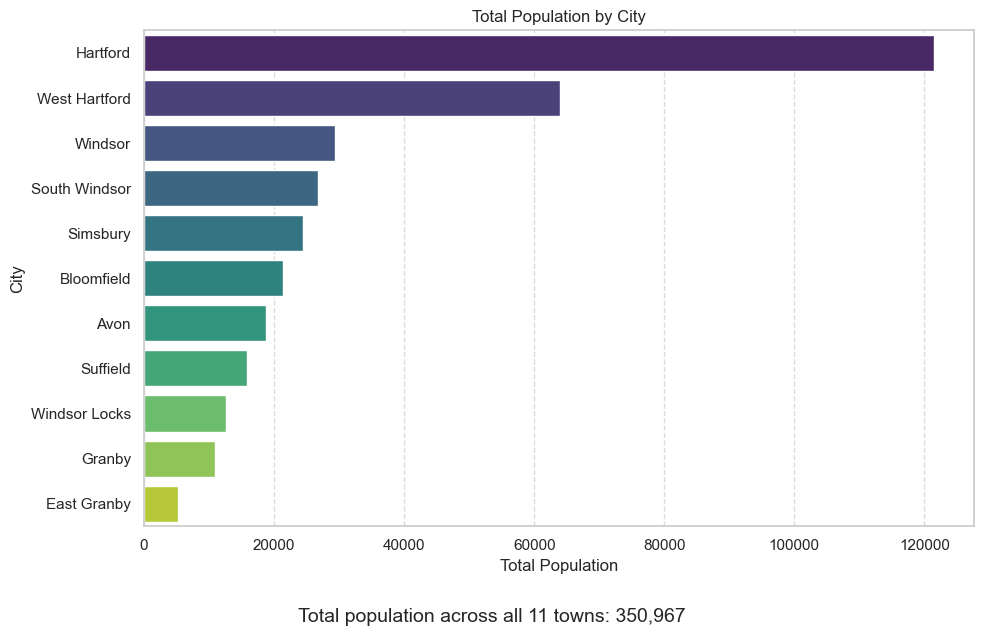

In [8]:
# 📊 Plot: Total Population by City with Overall Total

# Extract and clean relevant columns
df_total_pop = df_cleaned[['geographic_area_name', 's0101_total_total_population']].copy()
df_total_pop['city'] = df_total_pop['geographic_area_name'].str.split(',').str[0].str.replace(' town', '', regex=False)

# Sort by population
df_total_pop = df_total_pop.sort_values(by='s0101_total_total_population', ascending=False)

# Calculate total population
total_population = df_total_pop['s0101_total_total_population'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_total_pop,
    x='s0101_total_total_population',
    y='city',
    palette='viridis'
)

# Titles and labels
plt.title('Total Population by City')
plt.xlabel('Total Population')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add total population as label below plot
plt.figtext(
    0.5, -0.05,
    f"Total population across all 11 towns: {total_population:,.0f}",
    wrap=True, horizontalalignment='center', fontsize=14
)

plt.tight_layout()
plt.show()

In [9]:
# annual decrease rate for Hartford is 0.04%, so estimate at 2025 is:
# Get Hartford 2021 estimate
df_cleaned['city'] = df_cleaned['geographic_area_name'].str.split(',').str[0].str.replace(' town', '', regex=False)

hartford_pop_2021 = df_cleaned[df_cleaned['city'] == 'Hartford']['s0101_total_total_population'].values[0]

decline_rate = 0.0004
years = 4
hartford_pop_2025 = hartford_pop_2021 * (1 - decline_rate) ** years

print(f"Hartford population (2021): {hartford_pop_2021:,.0f}")
print(f"Estimated Hartford population (2025): {hartford_pop_2025:,.0f}")

Hartford population (2021): 121,562
Estimated Hartford population (2025): 121,368


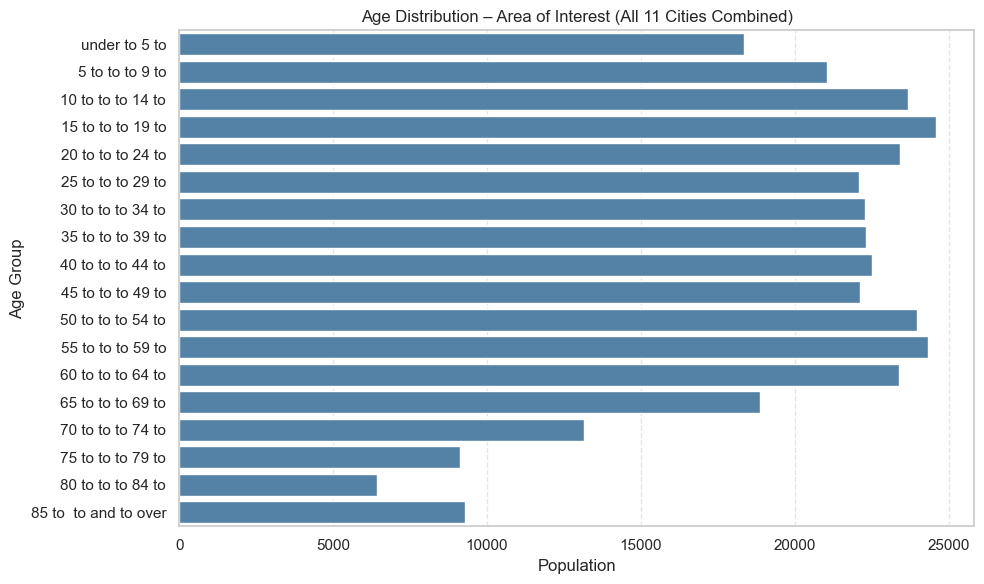

In [10]:
# Plot: Age Distribution by City (Grouped by Age Band)
# Extract and clean age columns
age_cols = [col for col in df_cleaned.columns if col.startswith('s0101_total_total_population_age_')]
df_age = df_cleaned[age_cols].copy()

# Compute total population across all 11 cities (Area of Interest)
df_area_total = df_age.sum().reset_index()
df_area_total.columns = ['age_group_raw', 'population']
df_area_total['age_group'] = (
    df_area_total['age_group_raw']
    .str.replace('s0101_total_total_population_age_', '', regex=False)
    .str.replace('_', ' to ')
    .str.replace('years', '')
    .str.replace('and over', '85+')
    .str.replace('under 5 to', 'under 5')
    .str.strip()
)

# Preserve original age order
df_area_total['age_group'] = pd.Categorical(df_area_total['age_group'], ordered=True, categories=df_area_total['age_group'].tolist())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_area_total, x='population', y='age_group', color='steelblue')
plt.title('Age Distribution – Area of Interest (All 11 Cities Combined)')
plt.xlabel('Population')
plt.ylabel('Age Group')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


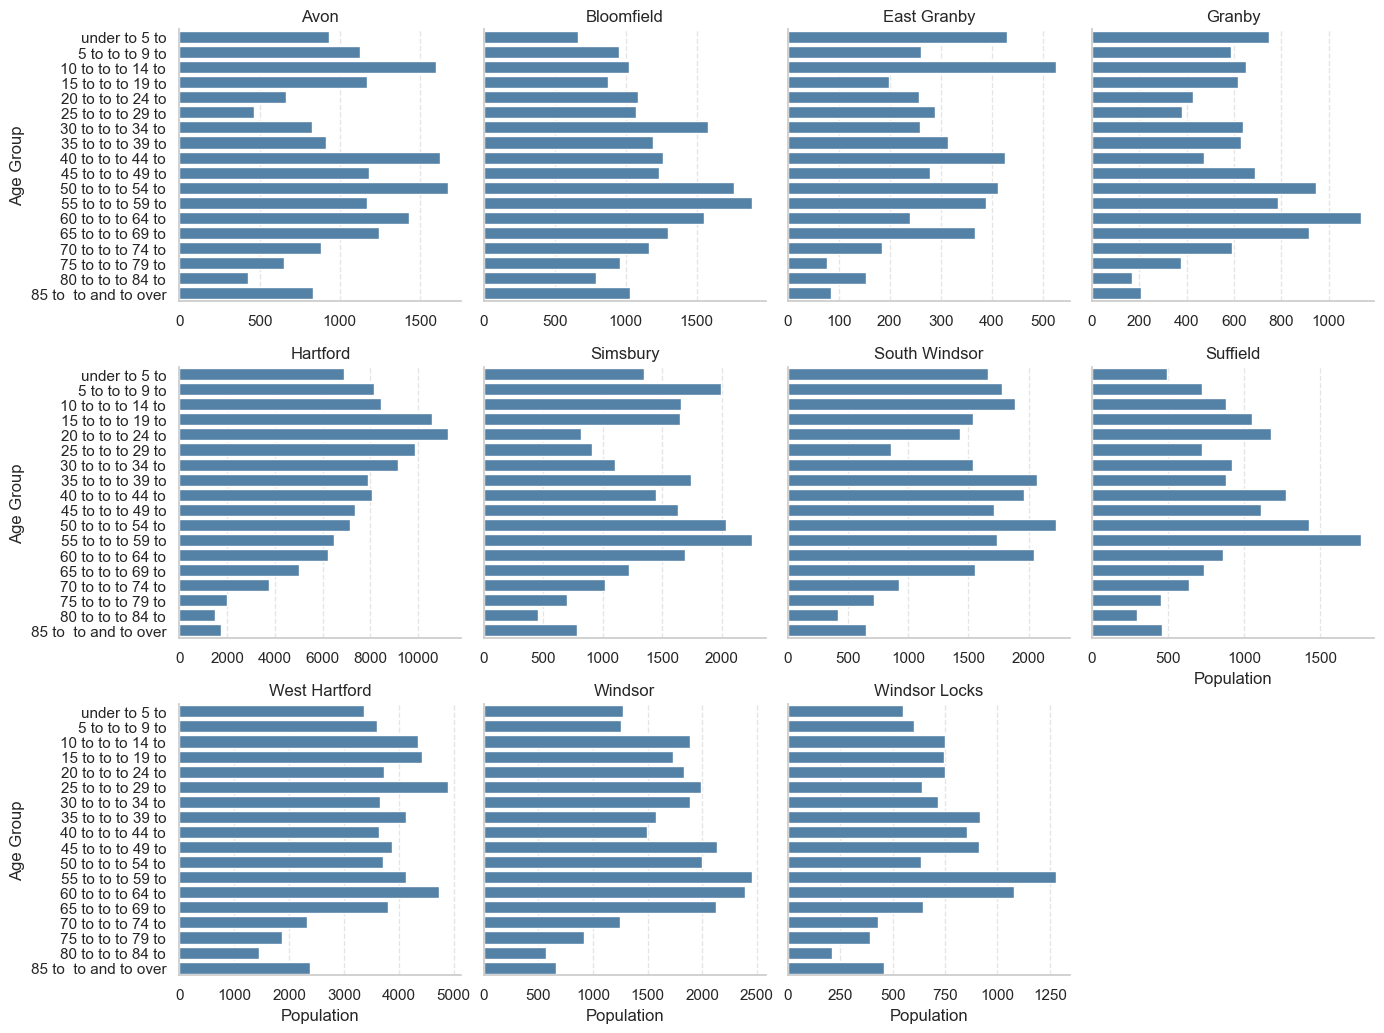

In [11]:
# Plot: Age Distribution by City (Faceted View – One Plot per City)

# Ensure clean city names are present
df_cleaned['city'] = df_cleaned['geographic_area_name'].str.split(',').str[0].str.replace(' town', '', regex=False)

# Extract relevant age columns
age_cols = [col for col in df_cleaned.columns if col.startswith('s0101_total_total_population_age_')]
df_age = df_cleaned[['city'] + age_cols].copy()

# Melt into long format
df_age_long = df_age.melt(id_vars='city', var_name='age_group_raw', value_name='population')

# Clean age group labels
df_age_long['age_group'] = (
    df_age_long['age_group_raw']
    .str.replace('s0101_total_total_population_age_', '', regex=False)
    .str.replace('_', ' to ')
    .str.replace('years', '')
    .str.replace('and over', '85+')
    .str.replace('under 5 to', 'under 5')
    .str.strip()
)

# Set age group ordering to match original column order
age_order = df_age_long['age_group'].unique().tolist()
df_age_long['age_group'] = pd.Categorical(df_age_long['age_group'], categories=age_order, ordered=True)

# Plot: One subplot per city
g = sns.FacetGrid(df_age_long, col='city', col_wrap=4, height=3.5, sharex=False, sharey=True)
g.map_dataframe(sns.barplot, x='population', y='age_group', color='steelblue')
g.set_titles("{col_name}")
g.set_axis_labels("Population", "Age Group")
for ax in g.axes.flat:
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

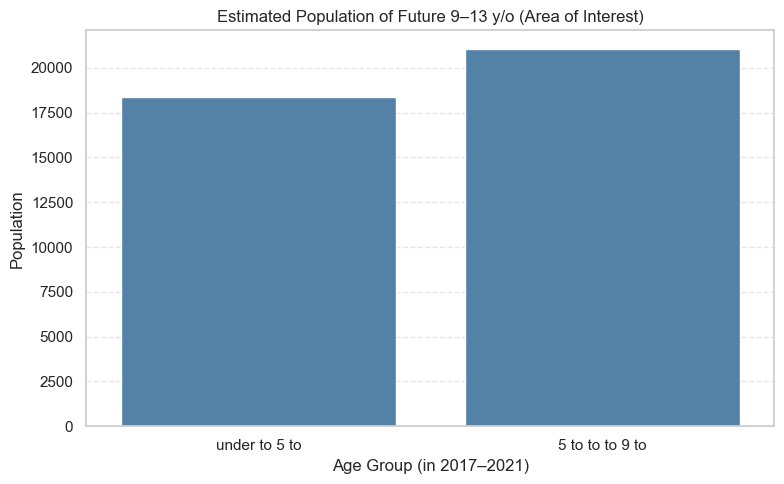

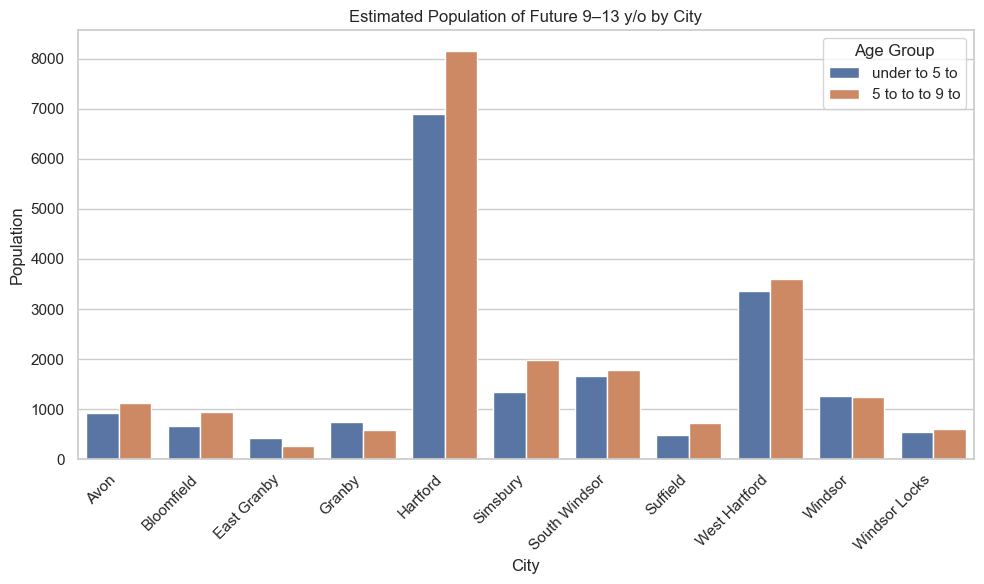

In [12]:
# Population Estimate: Future 9–13 y/o in 2025 (based on 2017–2021 data)

# Ensure city column is available
df_cleaned['city'] = df_cleaned['geographic_area_name'].str.split(',').str[0].str.replace(' town', '', regex=False)

# Target age group columns (kids aged 1–9 in 2017–2021 → under 5 + 5–9 groups)
target_age_cols = [
    's0101_total_total_population_age_under_5_years',
    's0101_total_total_population_age_5_to_9_years'
]

#  Plot 1: Area of Interest (Total)
# Sum across all towns
total_area_df = df_cleaned[target_age_cols].sum().reset_index()
total_area_df.columns = ['age_group_raw', 'population']
total_area_df['age_group'] = total_area_df['age_group_raw'].str.extract(r'age_(.*)').iloc[:, 0].str.replace('_', ' to ').str.replace('years', '').str.strip()

plt.figure(figsize=(8, 5))
sns.barplot(data=total_area_df, x='age_group', y='population', color='steelblue')
plt.title('Estimated Population of Future 9–13 y/o (Area of Interest)')
plt.xlabel('Age Group (in 2017–2021)')
plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Plot 2: Per-City Comparison 
# Subset and reshape
df_youth = df_cleaned[['city'] + target_age_cols].copy()
df_youth = df_youth.melt(id_vars='city', var_name='age_group_raw', value_name='population')
df_youth['age_group'] = df_youth['age_group_raw'].str.extract(r'age_(.*)').iloc[:, 0].str.replace('_', ' to ').str.replace('years', '').str.strip()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_youth, x='city', y='population', hue='age_group')
plt.title('Estimated Population of Future 9–13 y/o by City')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


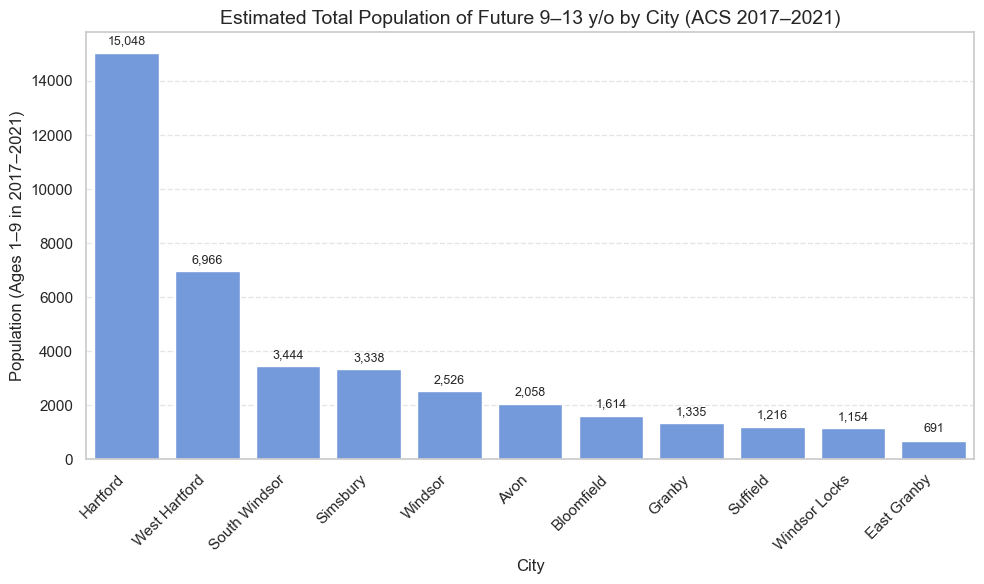

In [13]:
# Refined Plot: Estimated Total Population of Future 9–13 y/o by City

# Create total column
df_kids_total = df_cleaned[['city'] + target_age_cols].copy()
df_kids_total['total_kids_1_9'] = df_kids_total[target_age_cols].sum(axis=1)

# Sort by total
df_kids_total = df_kids_total.sort_values(by='total_kids_1_9', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df_kids_total, x='city', y='total_kids_1_9', color='cornflowerblue')

# Value labels
for i, row in enumerate(df_kids_total.itertuples()):
    plt.text(
        x=i,
        y=row.total_kids_1_9 + 200,
        s=f"{int(row.total_kids_1_9):,}",
        ha='center', va='bottom',
        fontsize=9
    )

# Styling
plt.title('Estimated Total Population of Future 9–13 y/o by City (ACS 2017–2021)', fontsize=14)
plt.xlabel('City')
plt.ylabel('Population (Ages 1–9 in 2017–2021)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

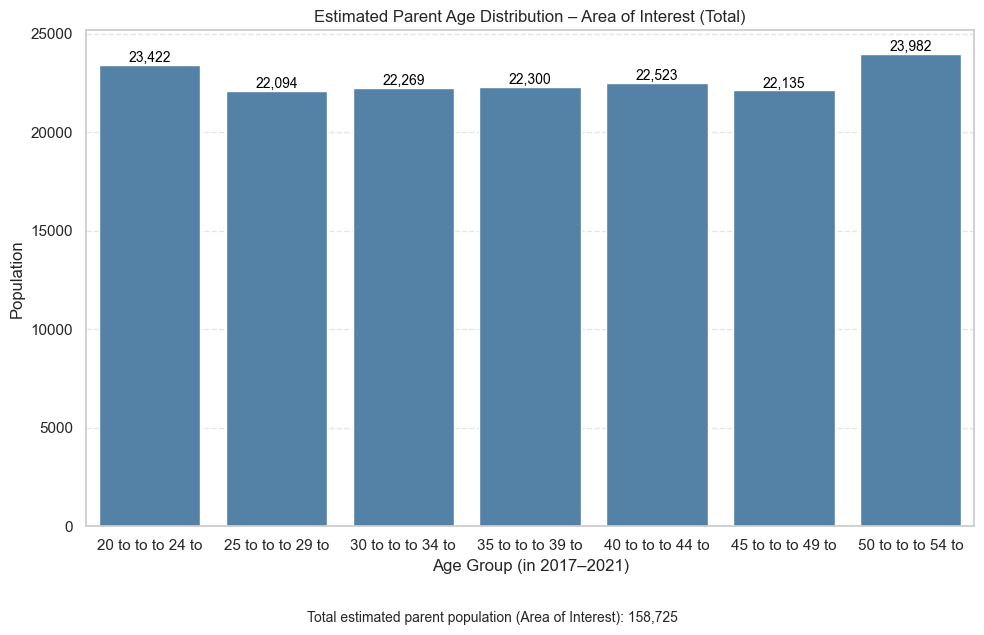

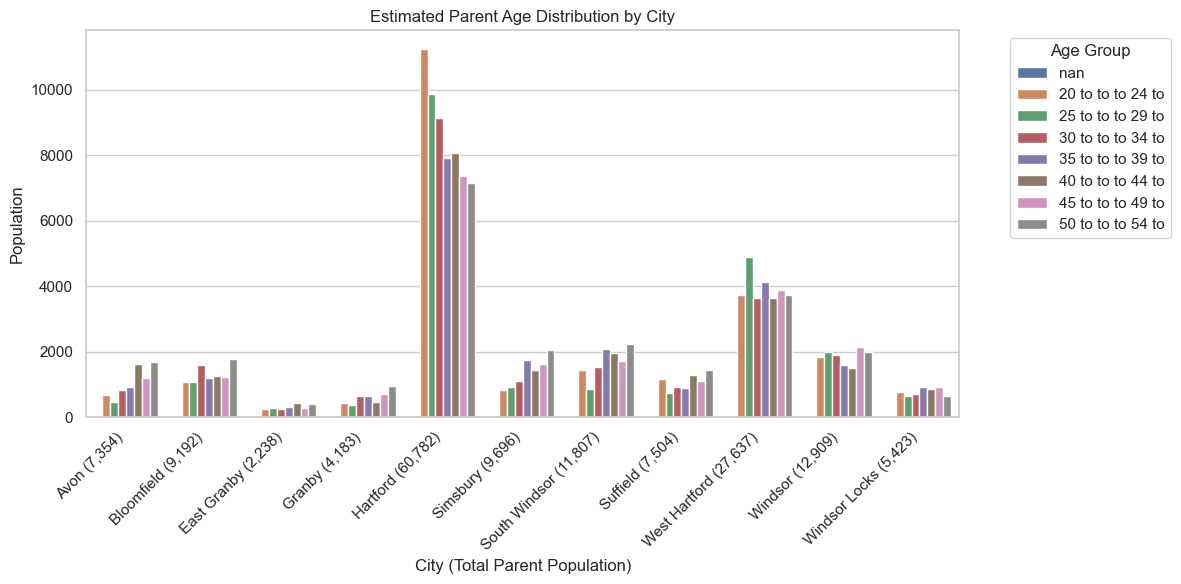

In [14]:
parent_age_cols = [
    's0101_total_total_population_age_20_to_24_years',
    's0101_total_total_population_age_25_to_29_years',
    's0101_total_total_population_age_30_to_34_years',
    's0101_total_total_population_age_35_to_39_years',
    's0101_total_total_population_age_40_to_44_years',
    's0101_total_total_population_age_45_to_49_years',
    's0101_total_total_population_age_50_to_54_years'
]

#Plot 1: Area of Interest (Total)
# Aggregate total parent population
total_parent_df = df_cleaned[parent_age_cols].sum().reset_index()
total_parent_df.columns = ['age_group_raw', 'population']
total_parent_df['age_group'] = (
    total_parent_df['age_group_raw']
    .str.extract(r'age_(.*)')[0]
    .str.replace('_', ' to ')
    .str.replace('years', '')
    .str.strip()
)
total_parent_df.loc[total_parent_df['age_group'] == '20 to 24', 'age_group'] += ' (partially relevant)'

# Compute grand total
total_parent_sum = total_parent_df['population'].sum()

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=total_parent_df, x='age_group', y='population', color='steelblue')

# Add value labels above bars
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    barplot.annotate(
        f'{int(height):,}',
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=10, color='black'
    )

# Title and styling
plt.title('Estimated Parent Age Distribution – Area of Interest (Total)')
plt.xlabel('Age Group (in 2017–2021)')
plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add total caption
plt.figtext(
    0.5, -0.05,
    f"Total estimated parent population (Area of Interest): {int(total_parent_sum):,}",
    wrap=True, horizontalalignment='center', fontsize=10
)

plt.tight_layout()
plt.show()

# Plot 2: Per-City Comparison
df_parents = df_cleaned[['city'] + parent_age_cols].copy()

# Total and labeled city
df_parents['total_parents'] = df_parents[parent_age_cols].sum(axis=1)
df_parents['city_labeled'] = df_parents['city'].astype(str) + ' (' + df_parents['total_parents'].astype(int).apply(lambda x: f"{x:,}") + ')'
df_parents['city_labeled'] = df_parents['city_labeled'].astype(str)  # 🔧 Explicit cast

# Reshape
df_parents_melted = df_parents.drop(columns='total_parents').melt(
    id_vars='city_labeled', var_name='age_group_raw', value_name='population'
)

df_parents_melted['age_group'] = (
    df_parents_melted['age_group_raw']
    .str.extract(r'age_(.*)')[0]
    .str.replace('_', ' to ')
    .str.replace('years', '')
    .str.strip()
)
df_parents_melted.loc[df_parents_melted['age_group'] == '20 to 24', 'age_group'] += ' (partially relevant)'

# Ensure all columns are typed properly
df_parents_melted['population'] = pd.to_numeric(df_parents_melted['population'], errors='coerce')
df_parents_melted['city_labeled'] = df_parents_melted['city_labeled'].astype(str)
df_parents_melted['age_group'] = df_parents_melted['age_group'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_parents_melted, x='city_labeled', y='population', hue='age_group')
plt.title('Estimated Parent Age Distribution by City')
plt.xlabel('City (Total Parent Population)')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


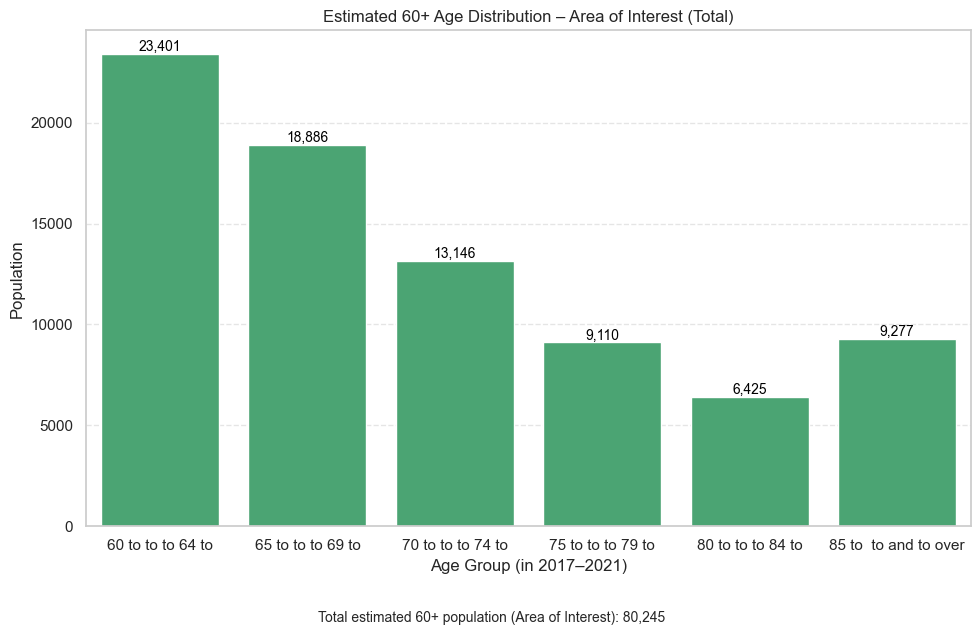

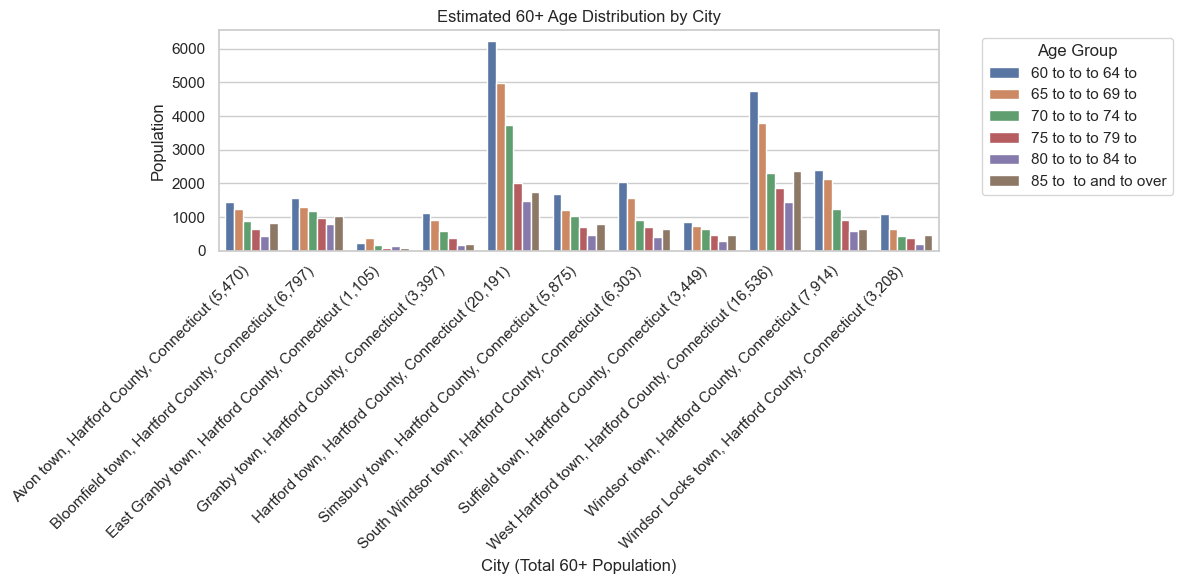

In [15]:
# population over 65 (60 in our dataset) total AoI and per city

# Load cleaned dataset
#df_cleaned = pd.read_csv("/Users/marcomagnolo/Desktop/NEXT/pro_bono_projects/ahsas_school/DATA/master_df.csv")

# Define columns for population aged 60+
elder_age_cols = [
    's0101_total_total_population_age_60_to_64_years',
    's0101_total_total_population_age_65_to_69_years',
    's0101_total_total_population_age_70_to_74_years',
    's0101_total_total_population_age_75_to_79_years',
    's0101_total_total_population_age_80_to_84_years',
    's0101_total_total_population_age_85_years_and_over'
]

# Plot 1: Area of Interest (Total)
total_elder_df = df_cleaned[elder_age_cols].sum().reset_index()
total_elder_df.columns = ['age_group_raw', 'population']
total_elder_df['age_group'] = (
    total_elder_df['age_group_raw']
    .str.extract(r'age_(.*)')[0]
    .str.replace('_', ' to ')
    .str.replace('years', '')
    .str.replace('and over', 'and over')
    .str.strip()
)

# Compute grand total
total_elder_sum = total_elder_df['population'].sum()

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=total_elder_df, x='age_group', y='population', color='mediumseagreen')

# Add value labels above bars
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    barplot.annotate(
        f'{int(height):,}',
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=10, color='black'
    )

# Styling
plt.title('Estimated 60+ Age Distribution – Area of Interest (Total)')
plt.xlabel('Age Group (in 2017–2021)')
plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.figtext(
    0.5, -0.05,
    f"Total estimated 60+ population (Area of Interest): {int(total_elder_sum):,}",
    wrap=True, horizontalalignment='center', fontsize=10
)
plt.tight_layout()
plt.show()

#  Plot 2: Per-City Comparison
df_elder = df_cleaned[['geographic_area_name'] + elder_age_cols].copy()
df_elder['total_elder'] = df_elder[elder_age_cols].sum(axis=1)
df_elder['city_labeled'] = df_elder['geographic_area_name'].astype(str) + ' (' + df_elder['total_elder'].astype(int).apply(lambda x: f"{x:,}") + ')'

# Reshape to long format
df_elder_melted = df_elder.drop(columns='total_elder').melt(
    id_vars='city_labeled', var_name='age_group_raw', value_name='population'
)

df_elder_melted['age_group'] = (
    df_elder_melted['age_group_raw']
    .str.extract(r'age_(.*)')[0]
    .str.replace('_', ' to ')
    .str.replace('years', '')
    .str.replace('and over', 'and over')
    .str.strip()
)

# Ensure proper types
df_elder_melted['population'] = pd.to_numeric(df_elder_melted['population'], errors='coerce')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_elder_melted, x='city_labeled', y='population', hue='age_group')
plt.title('Estimated 60+ Age Distribution by City')
plt.xlabel('City (Total 60+ Population)')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 🎯 Targeting the Right Age Groups: Youths, Parents (and GrandParents)

To ensure our campaign focuses on the **correct age groups**, we reverse-engineered the current and future ages of our target audience using the ACS 5-Year Estimates (2017–2021), which serve as the basis for our dataset.

---

#### 🧒 Youth Segment: Future Middle Schoolers

Our primary audience includes children who will be **ages 9–13 in 2025**, i.e., roughly 6th to 8th graders.

- These children were born between **2012 and 2016**.
- During the ACS data window (2017–2021), they would have been:
  - Between **1 and 9 years old**.

🔹 **Selected ACS Age Groups:**
- `Under 5 years`
- `5 to 9 years`

These bands fully encompass the population we are interested in influencing through child-focused outreach.

---

#### 👨‍👩‍👧 Parent Segment: Adults with School-Aged Children

To understand the family structure and household dynamics, we also targeted the parents of the above group, who are likely:

- **30–54 years old in 2025**  
- Born between **1971 and 1995**

During the 2017–2021 ACS window, these individuals would have been **20 to 54 years old**.

🔹 **Selected ACS Age Groups:**
- `20 to 24 years` *(partially relevant — included to avoid undercoverage)*
- `25 to 29 years`
- `30 to 34 years`
- `35 to 39 years`
- `40 to 44 years`
- `45 to 49 years`
- `50 to 54 years`

Including the 20–24 bracket ensures we capture younger parents, especially relevant in certain demographic segments.

---
#### GrandParents Segment: Adults over 65 years old
This is not a clearly identified TA in the business plan, but it may be worth taking it into consideration, assuming they could be reached by communication efforts aimed at informing of the existance of the school and pushed to report the information to their offspring.

---
This alignment ensures that we **accurately estimate our current and future target audience** using historical data, giving us the right base for plotting, messaging, and resource planning.


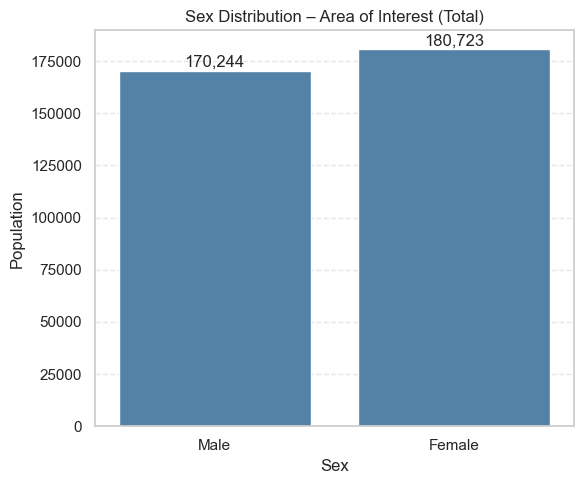

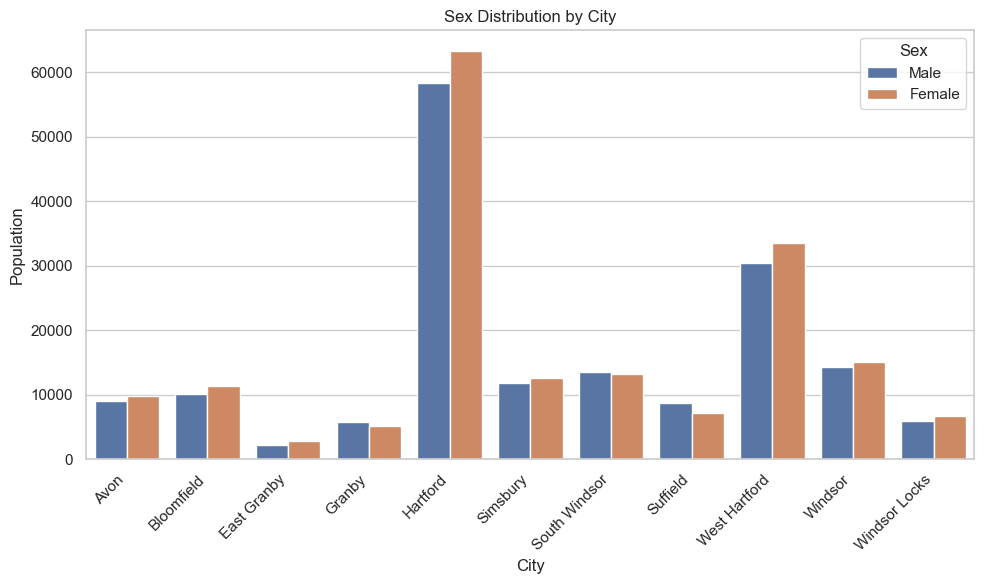

In [16]:
# Define gender columns
gender_cols = ['s0101_male_total_population', 's0101_female_total_population']

# Plot 1: Area of Interest (Total)
total_gender_df = df_cleaned[gender_cols].sum().reset_index()
total_gender_df.columns = ['gender_raw', 'population']
total_gender_df['gender'] = total_gender_df['gender_raw'].str.extract(r'(male|female)', expand=False).str.capitalize()

plt.figure(figsize=(6, 5))
sns.barplot(data=total_gender_df, x='gender', y='population', color='steelblue')

# Add value labels
for index, row in total_gender_df.iterrows():
    plt.text(index, row['population'] + 500, f"{int(row['population']):,}", ha='center', va='bottom')

plt.title('Sex Distribution – Area of Interest (Total)')
plt.xlabel('Sex')
plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Plot 2: Per-City Comparison
df_gender_city = df_cleaned[['city'] + gender_cols].copy()
df_gender_city = df_gender_city.melt(id_vars='city', var_name='gender_raw', value_name='population')
df_gender_city['gender'] = df_gender_city['gender_raw'].str.extract(r'(male|female)', expand=False).str.capitalize()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_gender_city, x='city', y='population', hue='gender')
plt.title('Sex Distribution by City')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

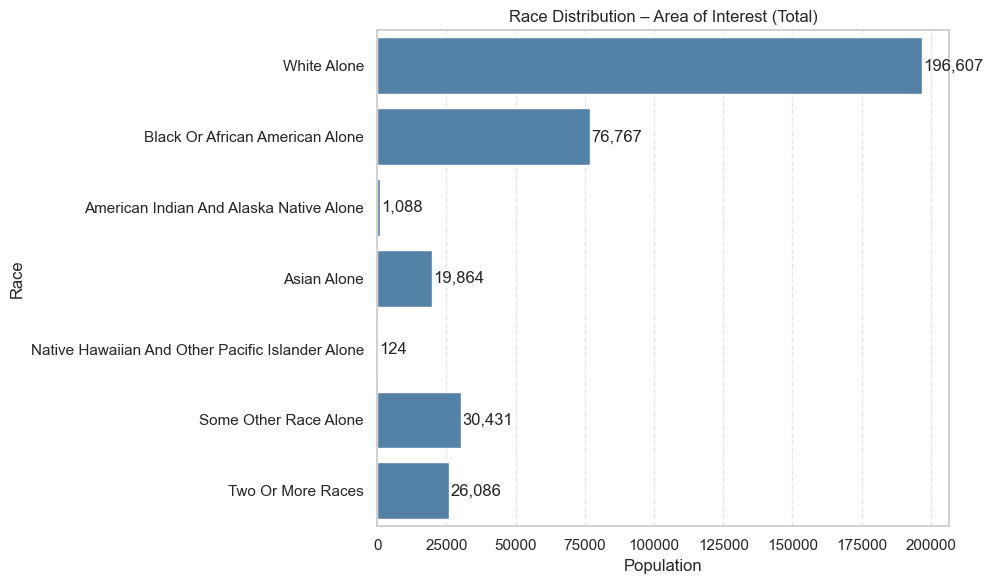

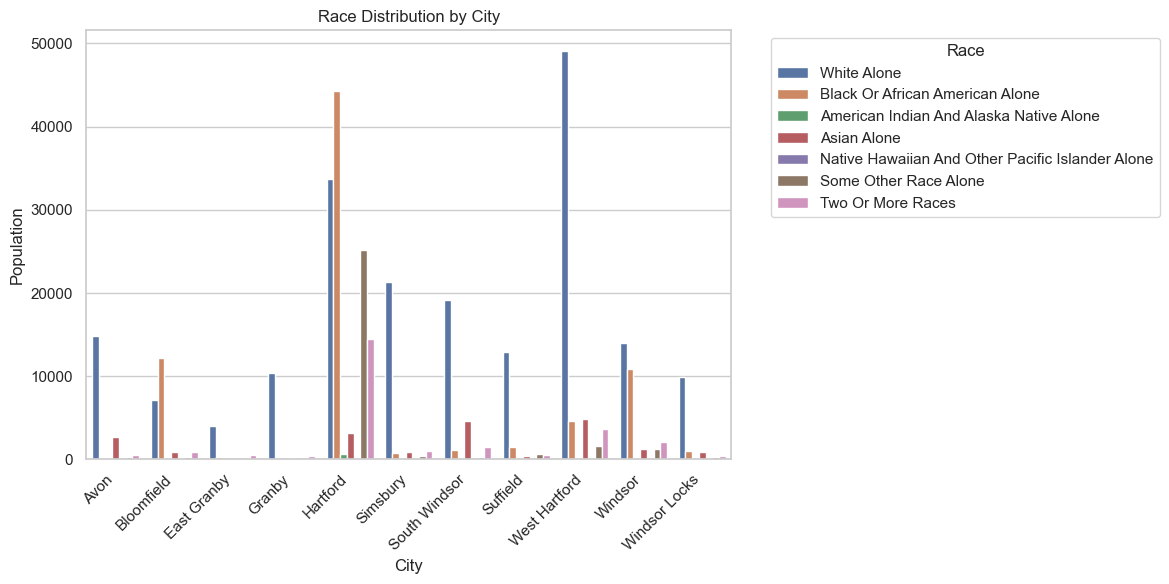

In [17]:
# Race columns (core 7 categories)
race_cols = [
    'b02001_total_white_alone',
    'b02001_total_black_or_african_american_alone',
    'b02001_total_american_indian_and_alaska_native_alone',
    'b02001_total_asian_alone',
    'b02001_total_native_hawaiian_and_other_pacific_islander_alone',
    'b02001_total_some_other_race_alone',
    'b02001_total_two_or_more_races'
]

# Plot 1: Area of Interest (Total)
total_race_df = df_cleaned[race_cols].sum().reset_index()
total_race_df.columns = ['race_raw', 'population']
total_race_df['race'] = (
    total_race_df['race_raw']
    .str.replace('b02001_total_', '', regex=False)
    .str.replace('_', ' ')
    .str.title()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=total_race_df, x='population', y='race', color='steelblue')

# Add value labels
for index, row in total_race_df.iterrows():
    plt.text(row['population'] + 500, index, f"{int(row['population']):,}", va='center')

plt.title('Race Distribution – Area of Interest (Total)')
plt.xlabel('Population')
plt.ylabel('Race')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Plot 2: Per-City Comparison
df_race_city = df_cleaned[['city'] + race_cols].copy()
df_race_city = df_race_city.melt(id_vars='city', var_name='race_raw', value_name='population')
df_race_city['race'] = (
    df_race_city['race_raw']
    .str.replace('b02001_total_', '', regex=False)
    .str.replace('_', ' ')
    .str.title()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_race_city, x='city', y='population', hue='race')
plt.title('Race Distribution by City')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

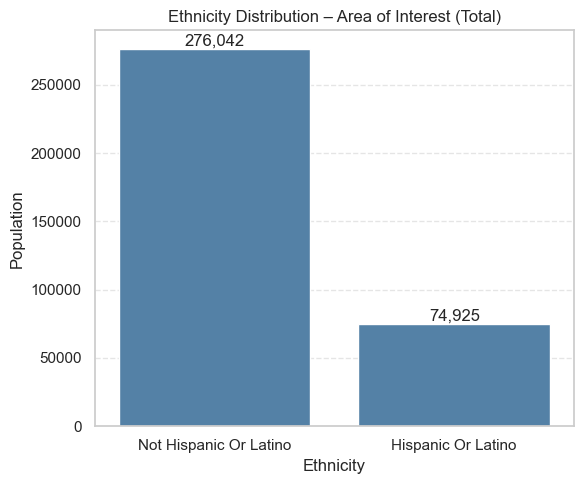

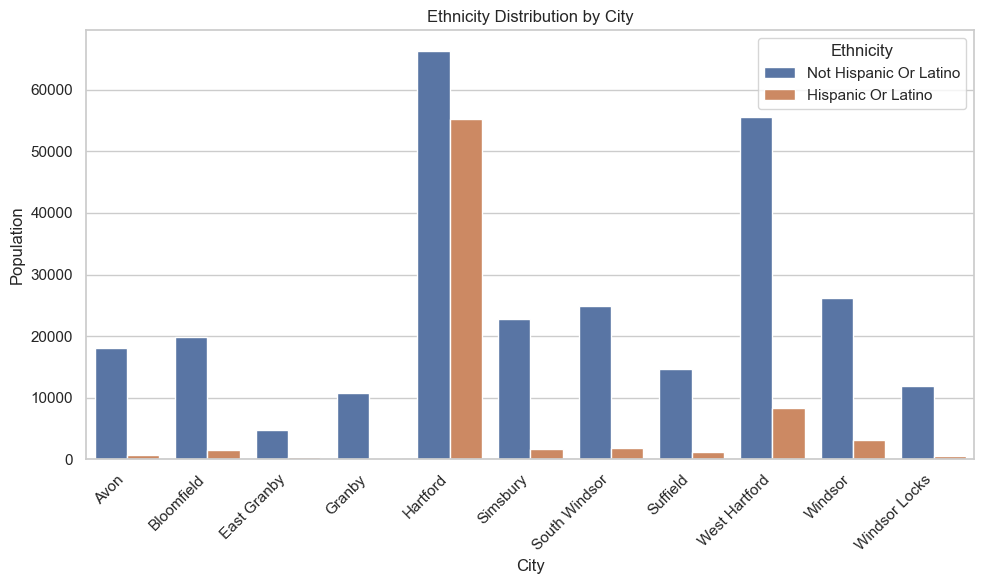

In [18]:
# Define ethnicity columns
ethnicity_cols = [
    'b03002_total_not_hispanic_or_latino',
    'b03002_total_hispanic_or_latino'
]

# Plot 1: Area of Interest (Total)
total_ethnicity_df = df_cleaned[ethnicity_cols].sum().reset_index()
total_ethnicity_df.columns = ['ethnicity_raw', 'population']
total_ethnicity_df['ethnicity'] = (
    total_ethnicity_df['ethnicity_raw']
    .str.replace('b03002_total_', '', regex=False)
    .str.replace('_', ' ')
    .str.title()
)

plt.figure(figsize=(6, 5))
sns.barplot(data=total_ethnicity_df, x='ethnicity', y='population', color='steelblue')

# Add labels
for index, row in total_ethnicity_df.iterrows():
    plt.text(index, row['population'] + 500, f"{int(row['population']):,}", ha='center', va='bottom')

plt.title('Ethnicity Distribution – Area of Interest (Total)')
plt.xlabel('Ethnicity')
plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Plot 2: Per-City Comparison
df_ethnicity_city = df_cleaned[['city'] + ethnicity_cols].copy()
df_ethnicity_city = df_ethnicity_city.melt(id_vars='city', var_name='ethnicity_raw', value_name='population')
df_ethnicity_city['ethnicity'] = (
    df_ethnicity_city['ethnicity_raw']
    .str.replace('b03002_total_', '', regex=False)
    .str.replace('_', ' ')
    .str.title()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_ethnicity_city, x='city', y='population', hue='ethnicity')
plt.title('Ethnicity Distribution by City')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ethnicity')
plt.tight_layout()
plt.show()

### 🗣️ Language Spoken at Home in Hartford (ACS 2021, C16001)

According to the American Community Survey 2021 5-Year Estimates, the linguistic landscape of Hartford reveals important insights for outreach and communication planning:

#### 📊 Total Population (Age 5+)
- **114,668** residents

#### 🏠 Language Spoken at Home
- **Speak only English:** 64,812  
  → ~57% of the population age 5 and over

- **Speak Spanish at home:** 41,601  
  → ~36% of the population age 5 and over

##### Among Spanish Speakers:
- **Speak English "very well":** 22,487 (~54% of Spanish speakers)
- **Speak English less than "very well":** 19,114 (~46% of Spanish speakers)

---

### 🔍 Interpretation

- Over **1 in 3 Hartford residents** aged 5+ speak **Spanish at home**.
- Nearly **1 in 6 residents** speaks Spanish **and may have limited English proficiency**.
- This indicates a **potential need for bilingual (Spanish-English) communication**, especially in:
  - School outreach (for enrollment)
  - School teaching

## EDUCATION ACHIEVEMENTS

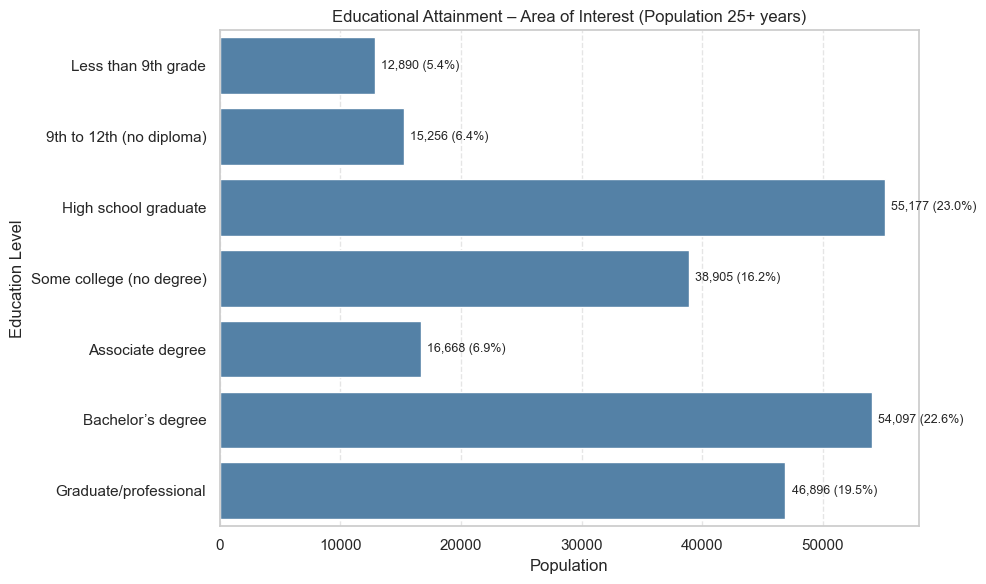

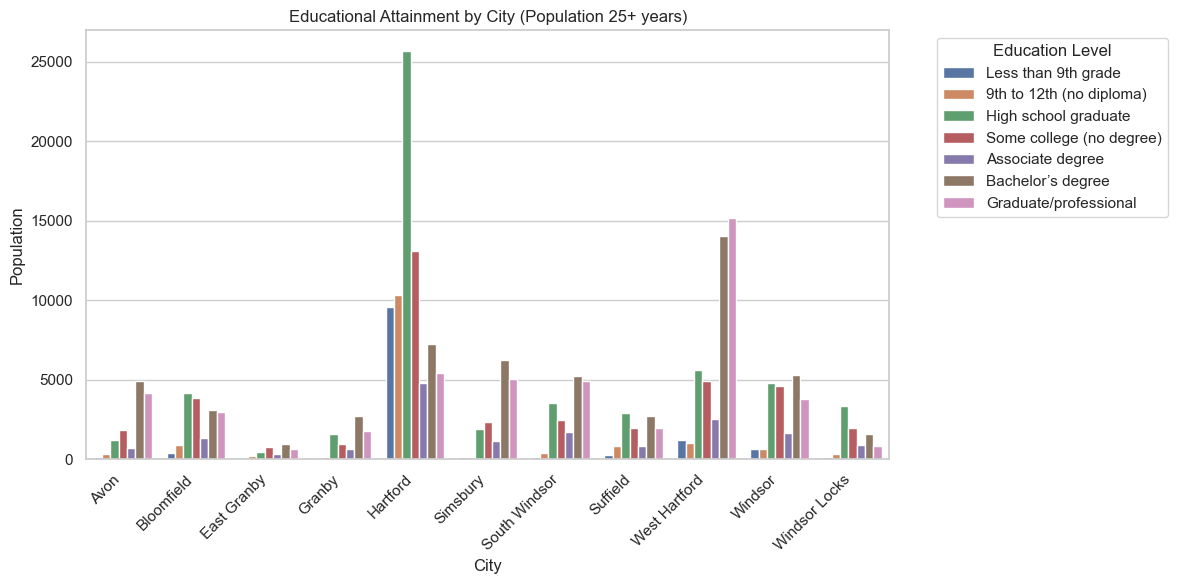

In [19]:
# EDUCATION ACHIEVEMENTS
# Step 1: Define education columns for age 25+
edu_cols_25plus = {
    'Less than 9th grade': 's1501_total_age_by_educational_attainment_population_25_years_and_over_less_than_9th_grade',
    '9th to 12th (no diploma)': 's1501_total_age_by_educational_attainment_population_25_years_and_over_9th_to_12th_grade_no_diploma',
    'High school graduate': 's1501_total_age_by_educational_attainment_population_25_years_and_over_high_school_graduate_includes_equivalency',
    'Some college (no degree)': 's1501_total_age_by_educational_attainment_population_25_years_and_over_some_college_no_degree',
    'Associate degree': 's1501_total_age_by_educational_attainment_population_25_years_and_over_associates_degree',
    'Bachelor’s degree': 's1501_total_age_by_educational_attainment_population_25_years_and_over_bachelors_degree',
    'Graduate/professional': 's1501_total_age_by_educational_attainment_population_25_years_and_over_graduate_or_professional_degree'
}

# Step 2: Area of Interest (Total)
total_25plus = df_cleaned['s1501_total_age_by_educational_attainment_population_25_years_and_over'].sum()

# Prepare data
df_edu_total = df_cleaned[list(edu_cols_25plus.values())].sum().reset_index()
df_edu_total.columns = ['column', 'population']
df_edu_total['education'] = df_edu_total['column'].map({v: k for k, v in edu_cols_25plus.items()})

# Calculate % of total
df_edu_total['percent'] = df_edu_total['population'] / total_25plus * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_edu_total, x='population', y='education', color='steelblue')

# Add labels: total and %
for i, row in df_edu_total.iterrows():
    label = f"{int(row['population']):,} ({row['percent']:.1f}%)"
    plt.text(row['population'] + 500, i, label, va='center', fontsize=9)

plt.title('Educational Attainment – Area of Interest (Population 25+ years)')
plt.xlabel('Population')
plt.ylabel('Education Level')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# Step 3: Per-City Comparison 
df_edu_city = df_cleaned[['city'] + list(edu_cols_25plus.values())].copy()
df_edu_city = df_edu_city.melt(id_vars='city', var_name='column', value_name='population')
df_edu_city['education'] = df_edu_city['column'].map({v: k for k, v in edu_cols_25plus.items()})

plt.figure(figsize=(12, 6))
sns.barplot(data=df_edu_city, x='city', y='population', hue='education')
plt.title('Educational Attainment by City (Population 25+ years)')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


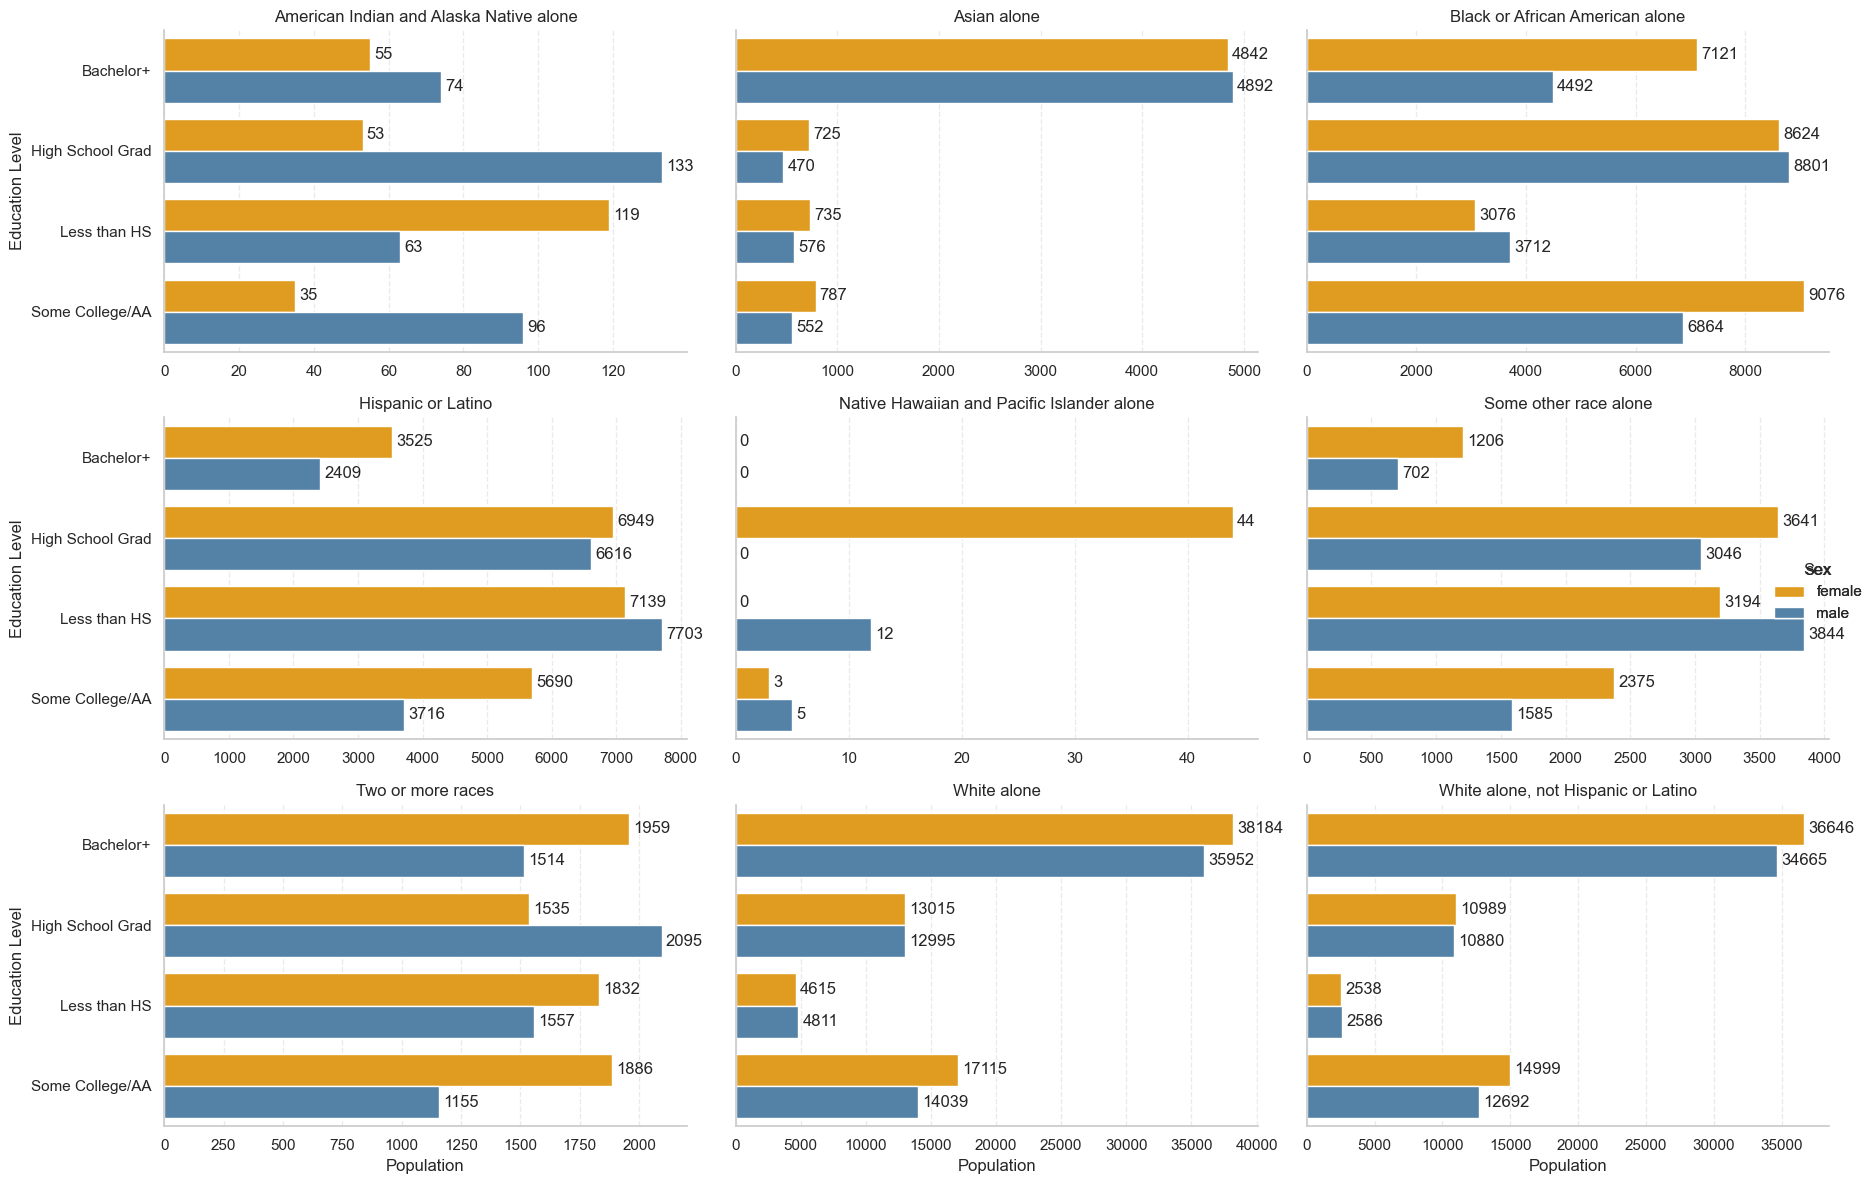

In [20]:
# Academic Achievement by Sex and Race (Area of Interest)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define education levels and race mappings
edu_labels = {
    'less_than_high_school_diploma': 'Less than HS',
    'high_school_graduate_includes_equivalency': 'High School Grad',
    'some_college_or_associates_degree': 'Some College/AA',
    'bachelors_degree_or_higher': 'Bachelor+'
}

race_mapping = {
    'a': 'White alone',
    'b': 'Black or African American alone',
    'c': 'American Indian and Alaska Native alone',
    'd': 'Asian alone',
    'e': 'Native Hawaiian and Pacific Islander alone',
    'f': 'Some other race alone',
    'g': 'Two or more races',
    'h': 'White alone, not Hispanic or Latino',
    'i': 'Hispanic or Latino'
}

# Get all relevant columns from c15002a–i
race_letters = list("abcdefghi")
edu_race_sex_cols = [col for col in df_cleaned.columns if col.startswith(tuple(f"c15002{r}_" for r in race_letters))]

# Melt the dataset
df_edu_race_sex = df_cleaned[edu_race_sex_cols].copy()
df_edu_race_sex = df_edu_race_sex.melt(var_name='column', value_name='population')

# Parse details from column names
df_edu_race_sex['race_code'] = df_edu_race_sex['column'].str.extract(r'c15002([a-i])_')
df_edu_race_sex['sex'] = df_edu_race_sex['column'].str.extract(r'_(male|female)')
df_edu_race_sex['edu_raw'] = df_edu_race_sex['column'].str.extract(r'male_(.*)|female_(.*)')[0].combine_first(
    df_edu_race_sex['column'].str.extract(r'male_(.*)|female_(.*)')[1]
)

# Apply readable labels
df_edu_race_sex['education'] = df_edu_race_sex['edu_raw'].map(edu_labels)
df_edu_race_sex['race'] = df_edu_race_sex['race_code'].map(race_mapping)

# Drop rows without valid education
df_edu_race_sex = df_edu_race_sex.dropna(subset=['education'])

# Group by race, sex, and education level
df_summary_total = df_edu_race_sex.groupby(['race', 'sex', 'education'], as_index=False)['population'].sum()

# Plot
sns.set_style("whitegrid")
g = sns.catplot(
    data=df_summary_total,
    x='population',
    y='education',
    hue='sex',
    col='race',
    kind='bar',
    col_wrap=3,
    height=4,
    aspect=1.4,
    sharex=False,
    palette = {"male": "steelblue", "female": "orange"}  # now male=salmon, female=blue
)

g.set_titles("{col_name}")
g.set_axis_labels("Population", "Education Level")
g.add_legend(title="Sex")

# Add bar labels
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
    ax.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

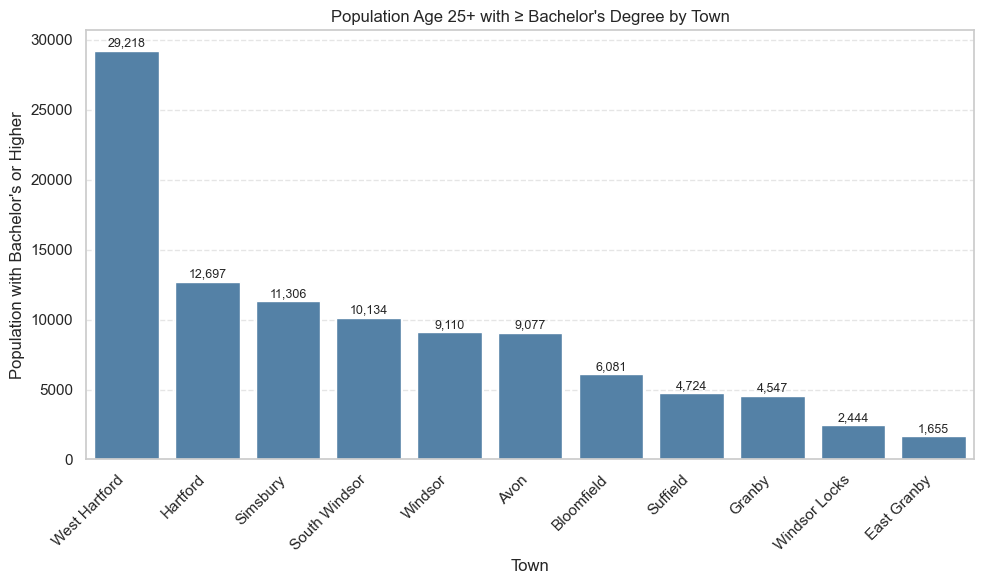

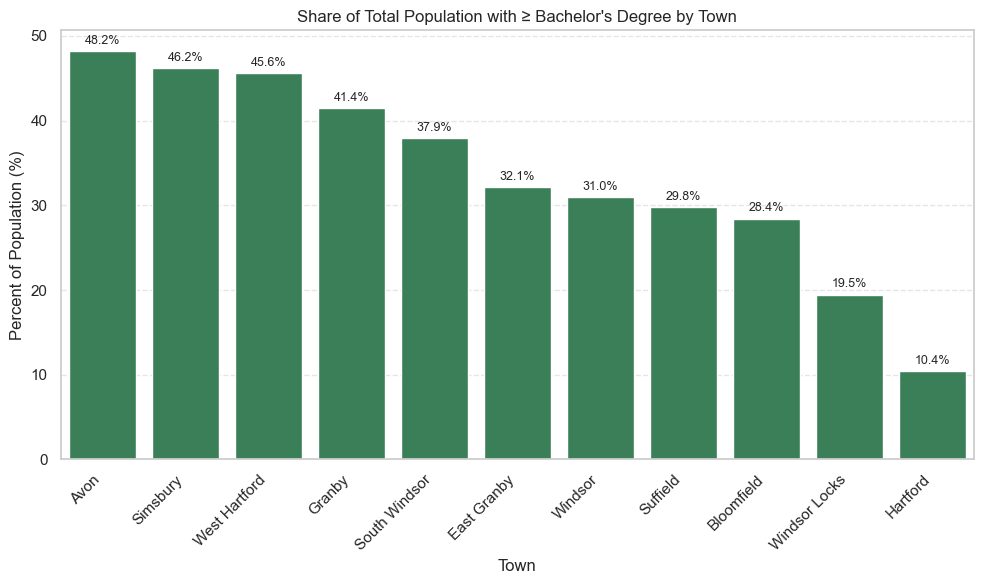

In [21]:
# Identify Cities with the most educated populations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set column names
education_col = 's1501_total_age_by_educational_attainment_population_25_years_and_over_bachelors_degree_or_higher'
population_col = 's0101_total_total_population'

# Filter and clean
df_edu = df_cleaned[['geographic_area_name', education_col, population_col]].dropna().copy()

# Simplify town names
df_edu['town_name'] = (
    df_edu['geographic_area_name']
    .str.replace(' town', '', case=False, regex=False)
    .str.replace('City of ', '', case=False, regex=False)
    .str.replace(', Hartford County, Connecticut', '', case=False, regex=False)
    .str.strip()
)

# Calculate % educated
df_edu['percent_educated'] = (df_edu[education_col] / df_edu[population_col]) * 100

# Sort by absolute number of educated people
df_edu_sorted_count = df_edu.sort_values(by=education_col, ascending=False)

# Plot 1: Absolute numbers
plt.figure(figsize=(10, 6))
sns.barplot(data=df_edu_sorted_count, x='town_name', y=education_col, color='steelblue')
plt.title("Population Age 25+ with ≥ Bachelor's Degree by Town")
plt.xlabel("Town")
plt.ylabel("Population with Bachelor's or Higher")
plt.xticks(rotation=45, ha='right')

# Add labels
for index, row in enumerate(df_edu_sorted_count.itertuples()):
    plt.text(
        x=index,
        y=row[2] + 100,
        s=f"{int(row[2]):,}",
        ha='center', va='bottom',
        fontsize=9
    )

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Sort by % educated
df_edu_sorted_pct = df_edu.sort_values(by='percent_educated', ascending=False)

# Plot 2: Percentage
plt.figure(figsize=(10, 6))
sns.barplot(data=df_edu_sorted_pct, x='town_name', y='percent_educated', color='seagreen')
plt.title("Share of Total Population with ≥ Bachelor's Degree by Town")
plt.xlabel("Town")
plt.ylabel("Percent of Population (%)")
plt.xticks(rotation=45, ha='right')

# Add labels
for index, row in enumerate(df_edu_sorted_pct.itertuples()):
    plt.text(
        x=index,
        y=row.percent_educated + 0.5,
        s=f"{row.percent_educated:.1f}%",
        ha='center', va='bottom',
        fontsize=9
    )

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Employment data

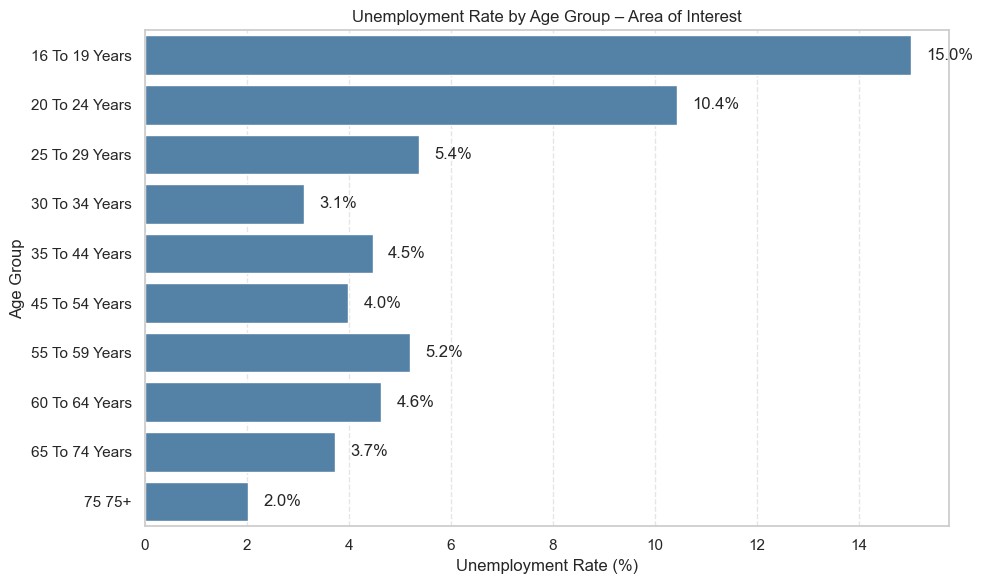

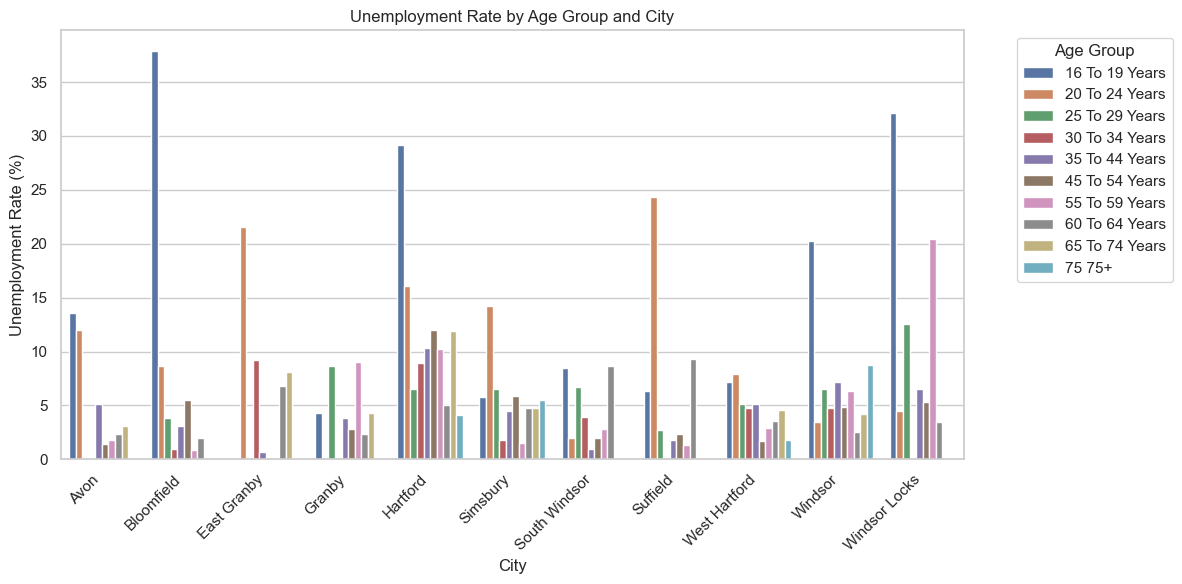

In [22]:
# Define relevant unemployment rate columns 
unemp_cols = [col for col in df_cleaned.columns if col.startswith('s2301_unemployment_rate_population_16_years_and_over_age_')]

# Clean age group labels 
age_label_map = {
    col: col.split('_age_')[-1].replace('_', ' ').replace('years and over', '75+').title()
    for col in unemp_cols
}

# Total (Area of Interest)
df_unemp_total = df_cleaned[unemp_cols].mean().reset_index()
df_unemp_total.columns = ['column', 'unemployment_rate']
df_unemp_total['age_group'] = df_unemp_total['column'].map(age_label_map)

# Plot total
plt.figure(figsize=(10, 6))
sns.barplot(data=df_unemp_total, x='unemployment_rate', y='age_group', color='steelblue')
for i, row in df_unemp_total.iterrows():
    plt.text(row['unemployment_rate'] + 0.3, i, f"{row['unemployment_rate']:.1f}%", va='center')
plt.title('Unemployment Rate by Age Group – Area of Interest')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Age Group')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Per City Comparison
df_unemp_city = df_cleaned[['city'] + unemp_cols].copy()
df_unemp_city = df_unemp_city.melt(id_vars='city', var_name='column', value_name='unemployment_rate')
df_unemp_city['age_group'] = df_unemp_city['column'].map(age_label_map)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_unemp_city, x='city', y='unemployment_rate', hue='age_group')
plt.title('Unemployment Rate by Age Group and City')
plt.xlabel('City')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

💡 The unemployment rate excludes retirees, as only individuals actively seeking work are counted as "unemployed."  
📉 This means older age groups often show low unemployment rates simply because many are no longer in the labor force.

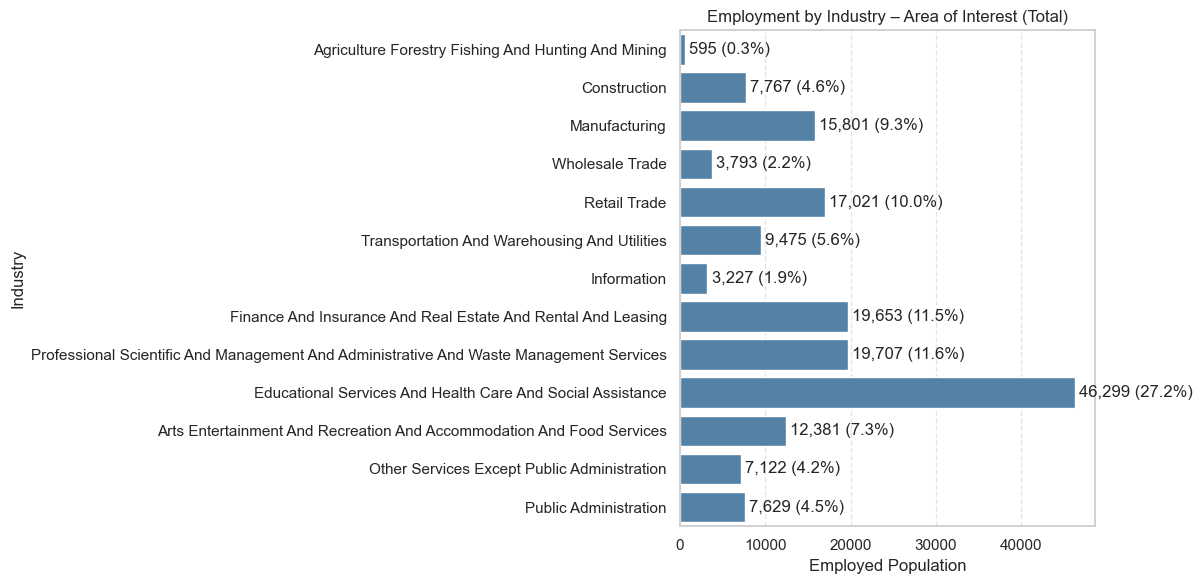

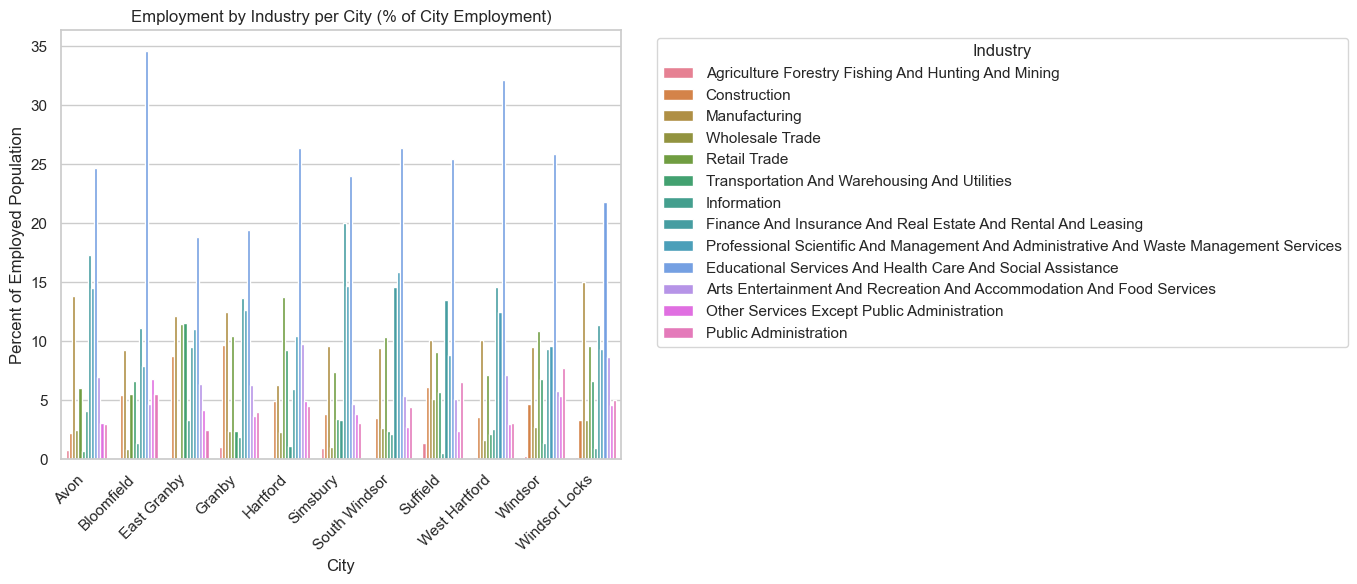

In [23]:
#  Step 1: Select industry columns and city 
industry_cols = [col for col in df_cleaned.columns if col.startswith('s2403_total_civilian_employed_population_16_years_and_over_')]
df_industry = df_cleaned[['city'] + industry_cols].copy()

# Step 2: Clean column names for readability
industry_labels = {
    col: col.replace('s2403_total_civilian_employed_population_16_years_and_over_', '').replace('_', ' ').title()
    for col in industry_cols
}
df_industry = df_industry.rename(columns=industry_labels)

# Step 3: Plot 1 – Area of Interest (Total)
df_total_industry = df_industry.drop(columns='city').sum().reset_index()
df_total_industry.columns = ['industry', 'employment']
df_total_industry['percent'] = df_total_industry['employment'] / df_total_industry['employment'].sum() * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=df_total_industry, x='employment', y='industry', color='steelblue')
for i, row in df_total_industry.iterrows():
    plt.text(row['employment'] + 500, i, f"{int(row['employment']):,} ({row['percent']:.1f}%)", va='center')
plt.title('Employment by Industry – Area of Interest (Total)')
plt.xlabel('Employed Population')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 4: Plot 2 – Per City (Percent of City Employment)
df_industry_percent = df_industry.copy()
industry_only_cols = list(industry_labels.values())
df_industry_percent['total_employed'] = df_industry_percent[industry_only_cols].sum(axis=1)
for col in industry_only_cols:
    df_industry_percent[col] = df_industry_percent[col] / df_industry_percent['total_employed'] * 100

# Melt for plotting
df_industry_pct_melted = df_industry_percent.melt(id_vars='city', value_vars=industry_only_cols,
                                                  var_name='industry', value_name='percent')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_industry_pct_melted, x='city', y='percent', hue='industry')
plt.title('Employment by Industry per City (% of City Employment)')
plt.xlabel('City')
plt.ylabel('Percent of Employed Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# INCOME Data

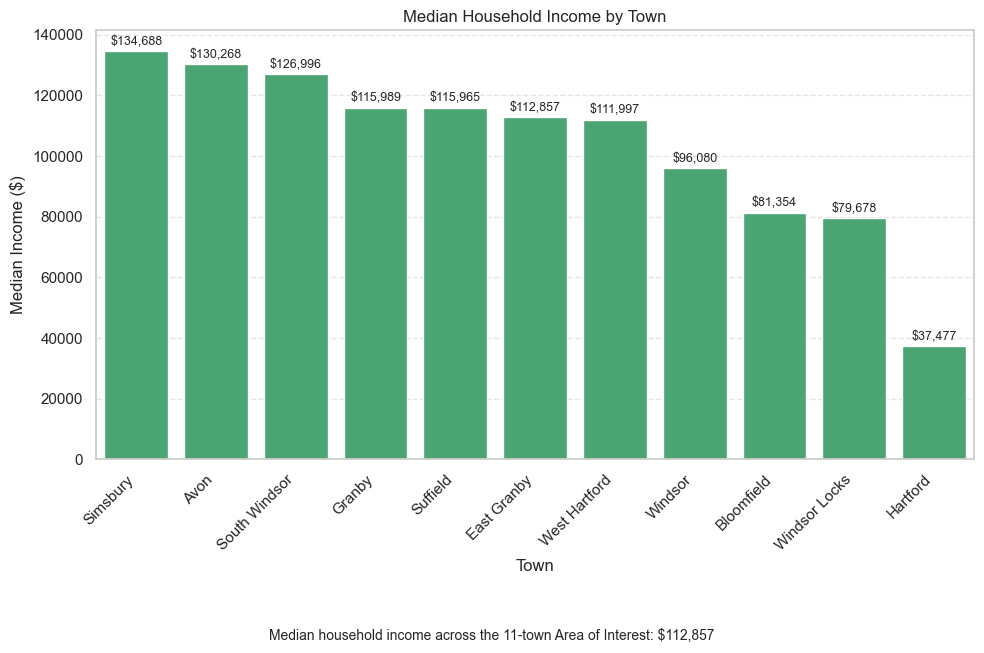

In [24]:
# Set income column
income_col = 's1901_households_median_income_dollars' 

# Clean town names 
df_sorted_income = df_cleaned[['geographic_area_name', income_col]].dropna().copy()

# Simplify labels (keep only town name)
df_sorted_income['town_name'] = (
    df_sorted_income['geographic_area_name']
    .str.replace(' town', '', case=False, regex=False)
    .str.replace('City of ', '', case=False, regex=False)
    .str.replace(', Hartford County, Connecticut', '', case=False, regex=False)
    .str.strip()
)

# Sort by income
df_sorted_income = df_sorted_income.sort_values(by=income_col, ascending=False)

# Compute area median
median_income_total = df_sorted_income[income_col].median()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted_income, x='town_name', y=income_col, color='mediumseagreen')
plt.title('Median Household Income by Town')
plt.xlabel('Town')
plt.ylabel('Median Income ($)')
plt.xticks(rotation=45, ha='right')

# Add value labels
for index, row in enumerate(df_sorted_income.itertuples()):
    plt.text(
        x=index,
        y=row[2] + 1000,
        s=f"${int(row[2]):,}",
        ha='center', va='bottom',
        fontsize=9
    )

# Add overall median
plt.figtext(
    0.5, -0.08,
    f"Median household income across the 11-town Area of Interest: ${int(median_income_total):,}",
    wrap=True, horizontalalignment='center', fontsize=10
)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

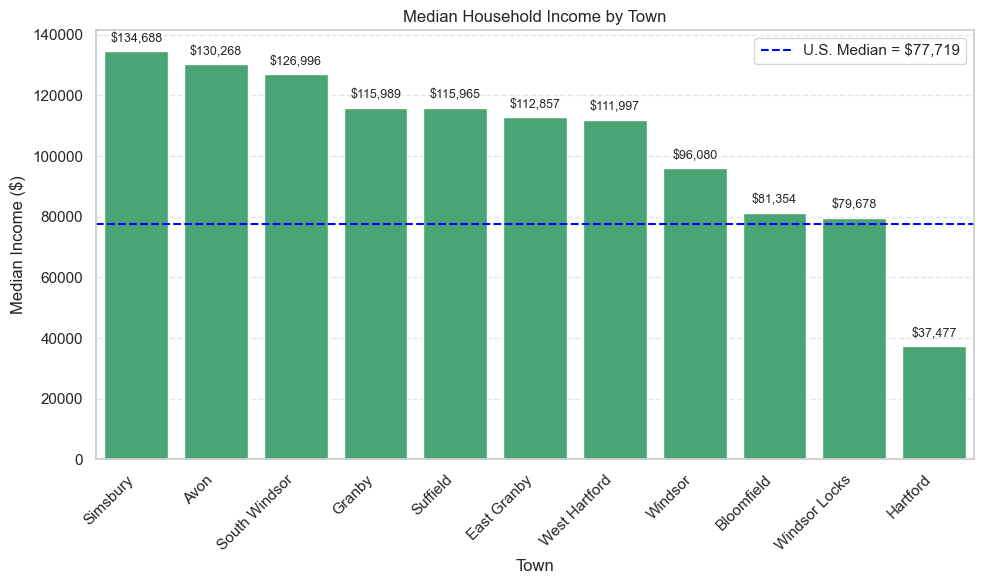

In [27]:
# Column names
income_col = 's1901_households_median_income_dollars'
geo_col = df_cleaned.columns[1] 

# Prepare data
df_income = df_cleaned[[geo_col, income_col]].dropna().copy()

# Clean town names
df_income['town_name'] = (
    df_income[geo_col]
    .str.replace(' town', '', case=False, regex=False)
    .str.replace('City of ', '', case=False, regex=False)
    .str.replace(', Hartford County, Connecticut', '', case=False, regex=False)
    .str.strip()
)

# Sort data
df_income_sorted = df_income.sort_values(by=income_col, ascending=False)

# Calculate medians
#area_median_income = df_income_sorted[income_col].median()
us_median_income = 77719

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_income_sorted, x='town_name', y=income_col, color='mediumseagreen')
plt.title('Median Household Income by Town')
plt.xlabel('Town')
plt.ylabel('Median Income ($)')
plt.xticks(rotation=45, ha='right')

# Add value labels
for index, row in enumerate(df_income_sorted.itertuples()):
    plt.text(
        x=index,
        y=row[2] + 2000,
        s=f"${int(row[2]):,}",
        ha='center', va='bottom',
        fontsize=9
    )

# Add horizontal lines
#plt.axhline(area_median_income, color='red', linestyle='--', linewidth=1.5, label=f'Area Median = ${int(area_median_income):,}')
plt.axhline(us_median_income, color='blue', linestyle='--', linewidth=1.5, label=f'U.S. Median = ${us_median_income:,}')
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [28]:
income_household_cols = {
    'All Households': 's1901_households_median_income_dollars',
    'Families': 's1901_families_median_income_dollars',
    'Married-Couple Families': 's1901_married_couple_families_median_income_dollars',
    'Nonfamily Households': 's1901_nonfamily_households_median_income_dollars'
}
# Median income by household type (Total Area)
df_income_total = df_cleaned[list(income_household_cols.values())].median().reset_index()
df_income_total.columns = ['column', 'median_income']
df_income_total['household_type'] = df_income_total['column'].map({v: k for k, v in income_household_cols.items()})
df_income_total = df_income_total[['household_type', 'median_income']]

# Median income by household type (Per Town)
df_income_by_town = df_cleaned[['geographic_area_name'] + list(income_household_cols.values())].copy()
df_income_by_town = df_income_by_town.rename(columns=income_household_cols)
df_income_by_town = df_income_by_town.melt(id_vars='geographic_area_name', var_name='household_type', value_name='median_income')

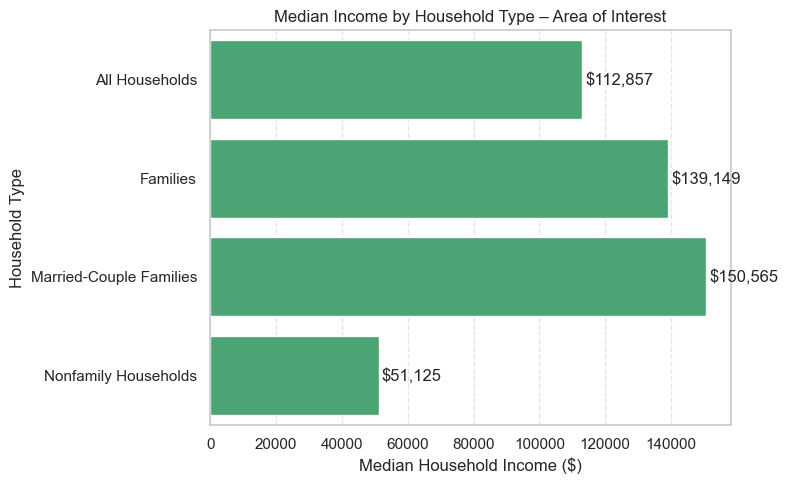

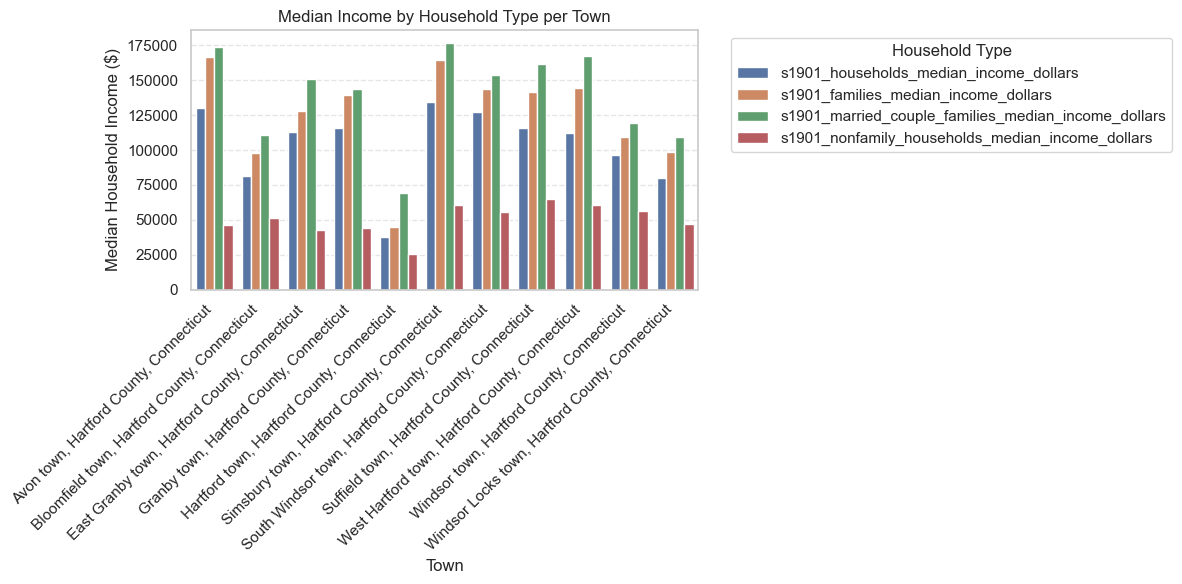

In [29]:
# Plot 1: Total Area of Interest (Median Income by Household Type)
plt.figure(figsize=(8, 5))
sns.barplot(data=df_income_total, x='median_income', y='household_type', color='mediumseagreen')

# Add value labels
for i, row in df_income_total.iterrows():
    plt.text(row['median_income'] + 1000, i, f"${int(row['median_income']):,}", va='center')

plt.title('Median Income by Household Type – Area of Interest')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Household Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Median Income by Household Type per Town
plt.figure(figsize=(12, 6))
sns.barplot(data=df_income_by_town, x='geographic_area_name', y='median_income', hue='household_type')

plt.title('Median Income by Household Type per Town')
plt.xlabel('Town')
plt.ylabel('Median Household Income ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Household Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

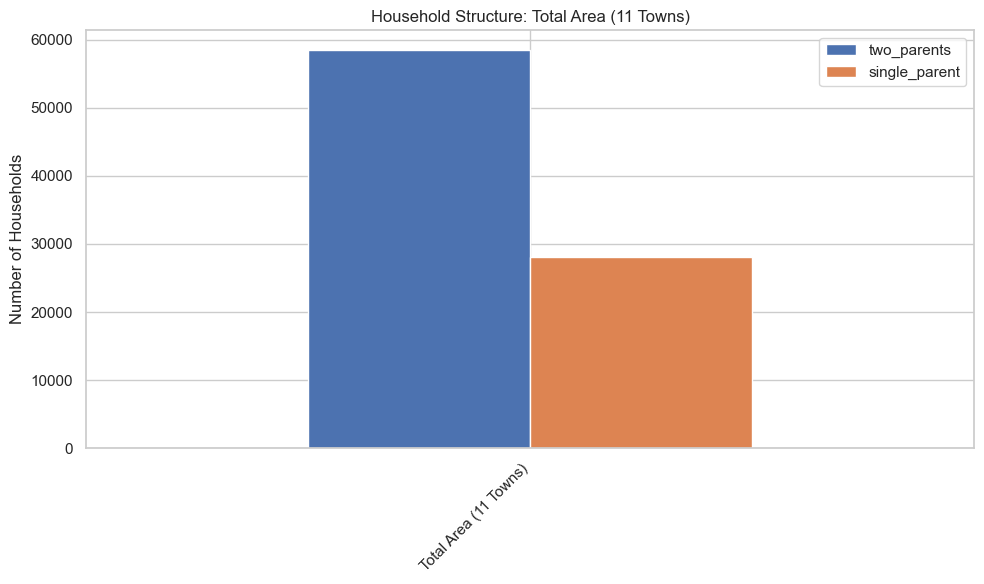

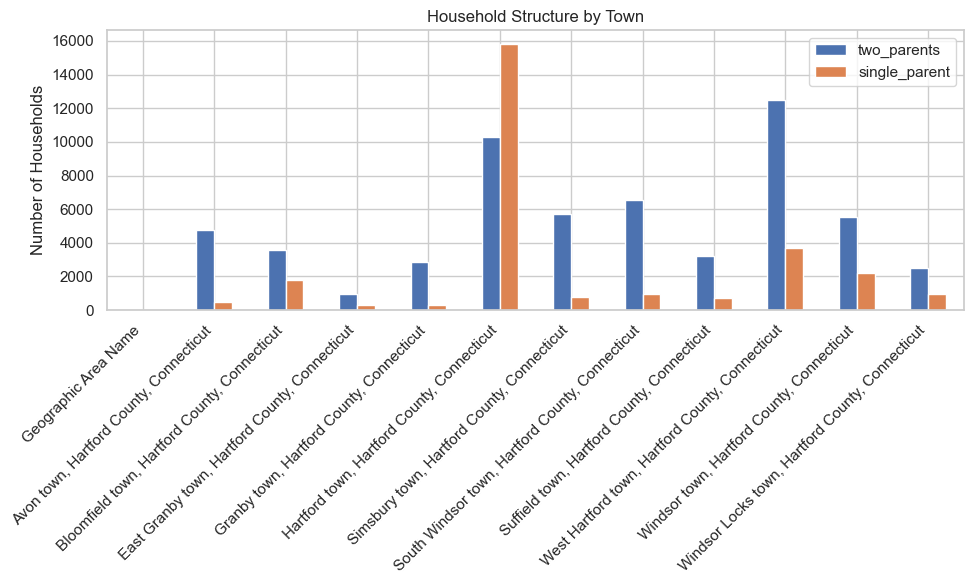

In [30]:
# single-parent vs two-parents households
# Load the dataset
data_path = "/Users/marcomagnolo/Desktop/NEXT/pro_bono_projects/ahsas_school/DATA/ACSST5Y2021.S1101_2025-06-06T064129/ACSST5Y2021.S1101-Data.csv"
df = pd.read_csv(data_path)

# Define the correct column codes for each household type
relevant_codes = {
    "Married-Couple Family": "S1101_C02_001E",
    "Male Householder, No Spouse": "S1101_C03_001E",
    "Female Householder, No Spouse": "S1101_C04_001E"
}

# Filter the needed columns and rename for readability
df_filtered = df[["NAME"] + list(relevant_codes.values())].copy()
df_filtered.columns = ["town", "married_couple", "male_householder", "female_householder"]

# Convert string numbers to float
for col in ["married_couple", "male_householder", "female_householder"]:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors="coerce")

# Compute single-parent and two-parent households
df_filtered["single_parent"] = df_filtered["male_householder"] + df_filtered["female_householder"]
df_filtered["two_parents"] = df_filtered["married_couple"]

# Plotting function
def plot_household_structure(df_plot, title):
    df_plot[["two_parents", "single_parent"]].plot(
        kind="bar",
        figsize=(10, 6),
        stacked=False,
        title=title
    )
    plt.ylabel("Number of Households")
    plt.xticks(ticks=range(len(df_plot)), labels=df_plot["town"], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot total (summed across towns)
total_row = df_filtered[["two_parents", "single_parent"]].sum().to_frame().T
total_row["town"] = "Total Area (11 Towns)"
plot_household_structure(total_row, "Household Structure: Total Area (11 Towns)")

# Plot by individual town
plot_household_structure(df_filtered, "Household Structure by Town")

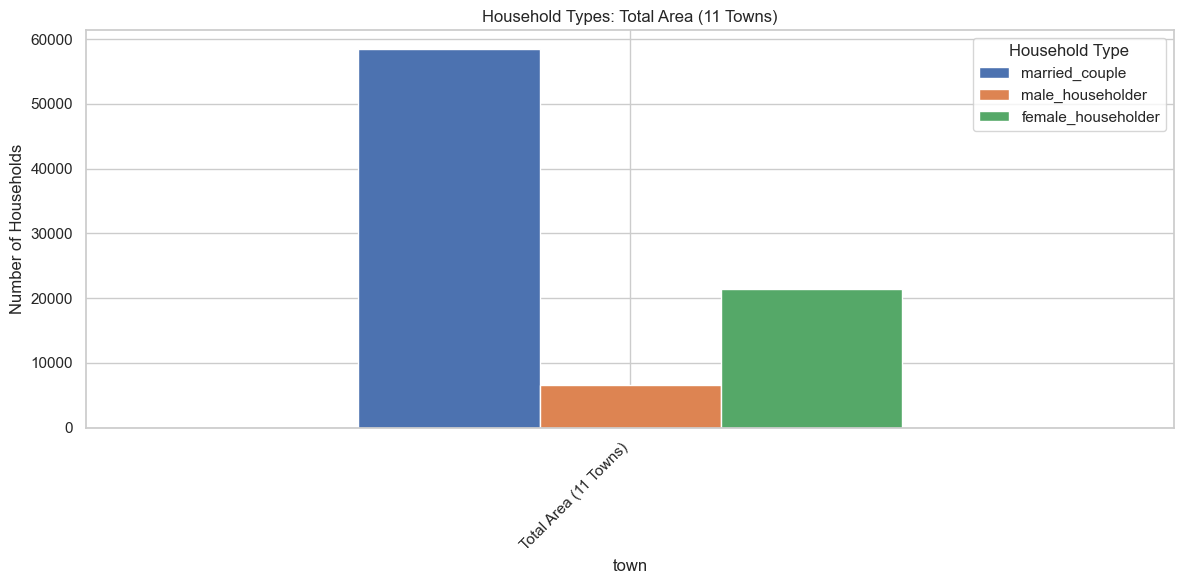

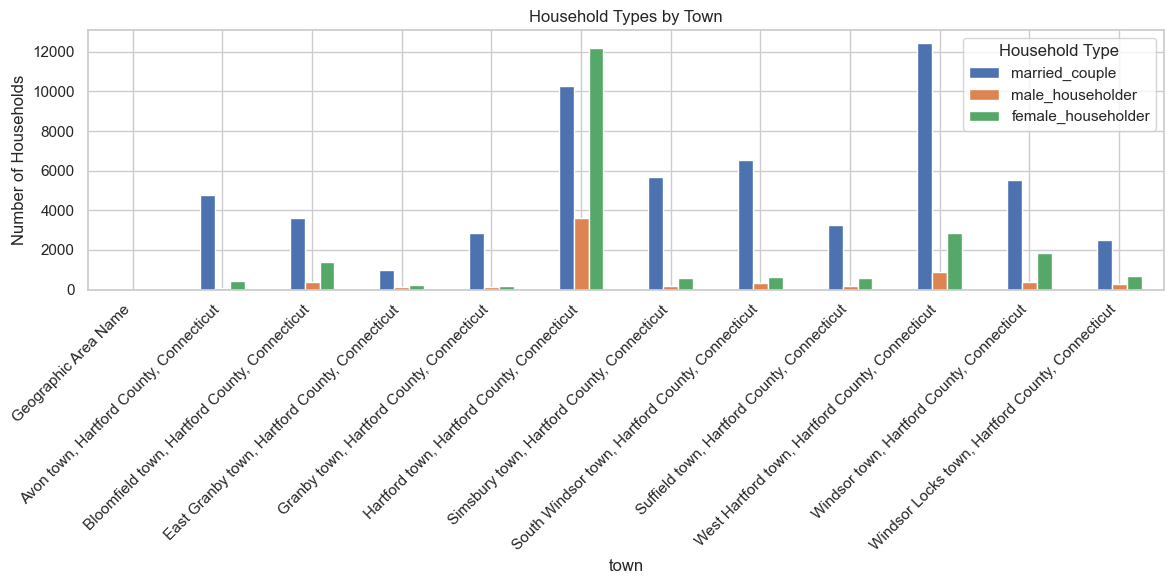

In [31]:
# single-parent (exploded by male or female) vs two-parents households

# Load the dataset
data_path = "/Users/marcomagnolo/Desktop/NEXT/pro_bono_projects/ahsas_school/DATA/ACSST5Y2021.S1101_2025-06-06T064129/ACSST5Y2021.S1101-Data.csv"
df = pd.read_csv(data_path)

# Define column codes for each household type
relevant_codes = {
    "Married-Couple Family": "S1101_C02_001E",
    "Male Householder, No Spouse": "S1101_C03_001E",
    "Female Householder, No Spouse": "S1101_C04_001E"
}

# Filter relevant columns and rename for clarity
df_filtered = df[["NAME"] + list(relevant_codes.values())].copy()
df_filtered.columns = ["town", "married_couple", "male_householder", "female_householder"]

# Convert columns to numeric
for col in ["married_couple", "male_householder", "female_householder"]:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors="coerce")

# Plotting function for grouped bar chart
def plot_grouped_household_types(df_plot, title):
    df_plot.set_index("town")[["married_couple", "male_householder", "female_householder"]].plot(
        kind="bar",
        stacked=False,
        figsize=(12, 6),
        title=title
    )
    plt.ylabel("Number of Households")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Household Type")
    plt.tight_layout()
    plt.show()

# Total area aggregation
total_row = df_filtered[["married_couple", "male_householder", "female_householder"]].sum().to_frame().T
total_row["town"] = "Total Area (11 Towns)"
plot_grouped_household_types(total_row, "Household Types: Total Area (11 Towns)")

# Individual towns
plot_grouped_household_types(df_filtered, "Household Types by Town")

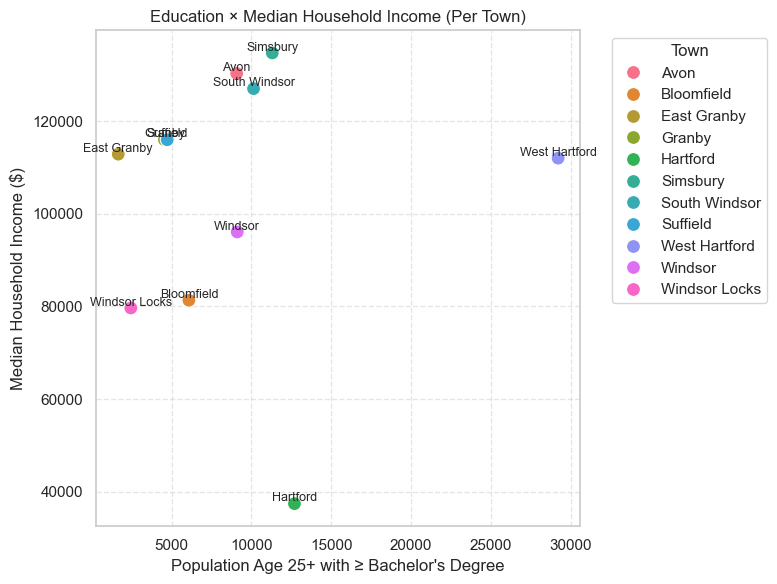

In [32]:
# Cross tab: income x education

# Set columns
education_col = 's1501_total_age_by_educational_attainment_population_25_years_and_over_bachelors_degree_or_higher'
income_col = 's1901_households_median_income_dollars'

# Extract and clean
df_cross = df_cleaned[['geographic_area_name', education_col, income_col]].dropna().copy()

# Simplify town names
df_cross['town_name'] = (
    df_cross['geographic_area_name']
    .str.replace(' town', '', case=False, regex=False)
    .str.replace('City of ', '', case=False, regex=False)
    .str.replace(', Hartford County, Connecticut', '', case=False, regex=False)
    .str.strip()
)

# Plot 1: Scatterplot for All Towns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cross, x=education_col, y=income_col, hue='town_name', s=100)

for i, row in df_cross.iterrows():
    plt.text(row[education_col], row[income_col] + 500, row['town_name'], ha='center', fontsize=9)

plt.title("Education × Median Household Income (Per Town)")
plt.xlabel("Population Age 25+ with ≥ Bachelor's Degree")
plt.ylabel("Median Household Income ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Town')
plt.tight_layout()
plt.show()

# Table: Sorted Cross-tab 
df_cross_sorted = df_cross.sort_values(by=education_col, ascending=False)
df_cross_sorted_display = df_cross_sorted[['town_name', education_col, income_col]]
df_cross_sorted_display.columns = ['Town', 'Educated Population (25+)', 'Median Household Income ($)']

#import ace_tools as tools; tools.display_dataframe_to_user(name="Education vs Income by Town", dataframe=df_cross_sorted_display)


This scatterplot shows the relationship between educational attainment and median household income across 11 towns. Each point represents a town, positioned by the number of residents aged 25+ with at least a bachelor's degree (x-axis) and the median household income (y-axis). While towns like West Hartford combine high education and income, others like Hartford show lower income despite moderate educational levels.

In [33]:
# Load your dataset
df = df_cleaned.copy()

# 1. Check Total Population vs Sum of Age Groups
age_cols = [col for col in df.columns if col.startswith('s0101_total_total_population_age_')]
df_age_check = df[['geographic_area_name', 's0101_total_total_population'] + age_cols].copy()

# Sum age bins per city
df_age_check['sum_of_age_bins'] = df_age_check[age_cols].sum(axis=1)

# Difference from reported total
df_age_check['age_sum_diff'] = df_age_check['s0101_total_total_population'] - df_age_check['sum_of_age_bins']

print("🔍 Population Total vs. Sum of Age Bins:")
print(df_age_check[['geographic_area_name', 's0101_total_total_population', 'sum_of_age_bins', 'age_sum_diff']])

# 2. Check Total Population vs Male + Female
df_sex_check = df[['geographic_area_name', 's0101_total_total_population', 's0101_male_total_population', 's0101_female_total_population']].copy()
df_sex_check['male_female_sum'] = df_sex_check['s0101_male_total_population'] + df_sex_check['s0101_female_total_population']
df_sex_check['sex_sum_diff'] = df_sex_check['s0101_total_total_population'] - df_sex_check['male_female_sum']

print("\n🔍 Population Total vs. Male + Female:")
print(df_sex_check[['geographic_area_name', 's0101_total_total_population', 'male_female_sum', 'sex_sum_diff']])

# 3. Check for Any Null or Zero Populations
print("\n🔍 Cities with Missing or Zero Total Population:")
print(df[df['s0101_total_total_population'].isna() | (df['s0101_total_total_population'] == 0)][['geographic_area_name', 's0101_total_total_population']])

# Flag cities with inconsistencies
print("\n⚠️ Cities with >1% difference in population sums:")
df_diff = df_age_check.copy()
df_diff['age_pct_diff'] = abs(df_diff['age_sum_diff'] / df_diff['s0101_total_total_population']) * 100
print(df_diff[df_diff['age_pct_diff'] > 1][['geographic_area_name', 'age_sum_diff', 'age_pct_diff']])


🔍 Population Total vs. Sum of Age Bins:
                                geographic_area_name  \
0            Avon town, Hartford County, Connecticut   
1      Bloomfield town, Hartford County, Connecticut   
2     East Granby town, Hartford County, Connecticut   
3          Granby town, Hartford County, Connecticut   
4        Hartford town, Hartford County, Connecticut   
5        Simsbury town, Hartford County, Connecticut   
6   South Windsor town, Hartford County, Connecticut   
7        Suffield town, Hartford County, Connecticut   
8   West Hartford town, Hartford County, Connecticut   
9         Windsor town, Hartford County, Connecticut   
10  Windsor Locks town, Hartford County, Connecticut   

    s0101_total_total_population  sum_of_age_bins  age_sum_diff  
0                          18821            18821             0  
1                          21399            21399             0  
2                           5148             5148             0  
3                      

### ✅ Internal Population Data Quality Check

To ensure reliable audience segmentation, we performed internal consistency checks across key demographic variables in the ACS dataset. The following validations were conducted:

---

#### 🔹 1. Population vs. Sum of Age Groups
We verified that the sum of all age group bins (e.g., under 5, 5–9, ..., 85+) equals the reported total population for each town.

- ✔ **Result**: All 11 towns show a perfect match.
- 🧠 **Interpretation**: Age-segmented data is complete and trustworthy for modeling children, parents, and elders.

---

#### 🔹 2. Population vs. Male + Female Totals
We validated that the total number of males and females adds up to the town’s total population.

- ✔ **Result**: All towns pass this test.
- 🧠 **Interpretation**: Gender-disaggregated analyses (e.g., education by sex, employment by sex) are safe to proceed with.

---

#### 🔹 3. Missing or Zero Values
We checked for towns with missing (`NaN`) or zero total population values.

- ✔ **Result**: No issues found.
- 🧠 **Interpretation**: The dataset contains no structural gaps or placeholder entries.

---

#### 🔹 4. Outliers or Discrepancies >1%
We flagged cities where the sum of parts deviated from the total by more than 1%.

- ✔ **Result**: No towns exceeded the threshold.
- 🧠 **Interpretation**: No evidence of rounding errors or suppressed values.

---

### ✅ Conclusion
The demographic base data is **clean, internally consistent, and ready** for targeting, segmentation, and dashboarding. No remediation needed.


In [36]:
# Let's try to infer number of homeschoolers

import pandas as pd

# Load the cleaned dataset
data_path = "/Users/marcomagnolo/Desktop/NEXT/pro_bono_projects/ahsas_school/DATA/clean_datasets/master_df_tableau_ready.csv"
df = pd.read_csv(data_path)

# Ensure 'city' column is present and cleaned
df['city'] = df['geographic_area_name'].str.split(',').str[0].str.strip()

# Select relevant age columns
child_age_cols = [
    's0101_total_total_population_age_5_to_9_years',
    's0101_total_total_population_age_10_to_14_years'
]

# Rename and calculate
df_children = df[['city'] + child_age_cols].copy()
df_children.columns = ['city', 'age_5_9', 'age_10_14']
df_children['total_5_to_14'] = df_children['age_5_9'] + df_children['age_10_14']

# Display total for 11-town area
print("🔢 Total Children Age 5–9, 10–14, and 5–14 Combined Across All Towns:\n")
print(df_children[['age_5_9', 'age_10_14', 'total_5_to_14']].sum())

# Display per-town breakdown
print("\n🏙️ Children Age 5–14 by Town:\n")
print(df_children.sort_values('total_5_to_14', ascending=False))

🔢 Total Children Age 5–9, 10–14, and 5–14 Combined Across All Towns:

age_5_9          21034
age_10_14        23670
total_5_to_14    44704
dtype: int64

🏙️ Children Age 5–14 by Town:

                  city  age_5_9  age_10_14  total_5_to_14
4        Hartford town     8154       8468          16622
8   West Hartford town     3604       4340           7944
6   South Windsor town     1779       1888           3667
5        Simsbury town     1992       1656           3648
9         Windsor town     1254       1885           3139
0            Avon town     1126       1599           2725
1      Bloomfield town      952       1027           1979
7        Suffield town      722        878           1600
10  Windsor Locks town      604        750           1354
3          Granby town      586        652           1238
2     East Granby town      261        527            788


In [72]:
import pandas as pd
from io import StringIO

data = """
Town,total children aged 10_14,total enrolled,enrolled public school,enrolled private school,not enrolled
AVON,1599,1115,1039,76,484
BLOOMFIELD,1027,705,663,42,322
EAST GRANBY,527,372,372,0,155
GRANBY,652,428,428,0,224
HARTFORD,8468,6721,6434,287,1747
SIMSBURY,1656,1433,1248,185,223
SOUTH WINDSOR,1888,1479,1431,48,409
SUFFIELD,878,685,604,81,193
WEST HARTFORD,4340,3629,3305,324,711
WINDSOR,1885,1399,1327,72,486
WINDSOR LOCKS,750,495,462,33,255
"""

# Load into DataFrame
df = pd.read_csv(StringIO(data))

# Add % not enrolled column
df['% not enrolled'] = (df['not enrolled'] / df['total children aged 10_14'] * 100).round(1)

df.head(12)

,Town,total children aged 10_14,total enrolled,enrolled public school,enrolled private school,not enrolled,% not enrolled
0,AVON,1599,1115,1039,76,484,30.30
1,BLOOMFIELD,1027,705,663,42,322,31.40
2,EAST GRANBY,527,372,372,0,155,29.40
3,GRANBY,652,428,428,0,224,34.40
4,HARTFORD,8468,6721,6434,287,1747,20.60
5,SIMSBURY,1656,1433,1248,185,223,13.50
6,SOUTH WINDSOR,1888,1479,1431,48,409,21.70
7,SUFFIELD,878,685,604,81,193,22.00
8,WEST HARTFORD,4340,3629,3305,324,711,16.40
9,WINDSOR,1885,1399,1327,72,486,25.80
